# Comprehensive EDA: Walmart Inbound Forecasting Dataset
## merged_data_model_ready_interactions.csv

This notebook provides a thorough exploratory data analysis of the final merged dataset containing:
- 275,000 records (store-department-day level)
- 60 features from 6 data sources
- 5 departments across 5 stores
- Time period: ~18 months

In [44]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

plt.rcParams['font.size'] = 11

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [45]:
# Load data
df = pd.read_csv('data/processed/merged_data_model_ready_interactions.csv', parse_dates=['dt'])

print(f"Dataset Shape: {df.shape}")
print(f"\nDate Range: {df['dt'].min()} to {df['dt'].max()}")
print(f"Total Days: {(df['dt'].max() - df['dt'].min()).days}")
print(f"\nDepartments: {df['dept_id'].nunique()}")
print(f"Stores: {df['store_id'].nunique()}")
print(f"States: {df['state_name'].nunique()}")

Dataset Shape: (275000, 62)

Date Range: 2024-03-14 00:00:00 to 2025-09-14 00:00:00
Total Days: 549

Departments: 5
Stores: 100
States: 36


---
## 1. Target Variable Analysis
### Understanding the distribution and characteristics of 'cases' (inbound shipments)

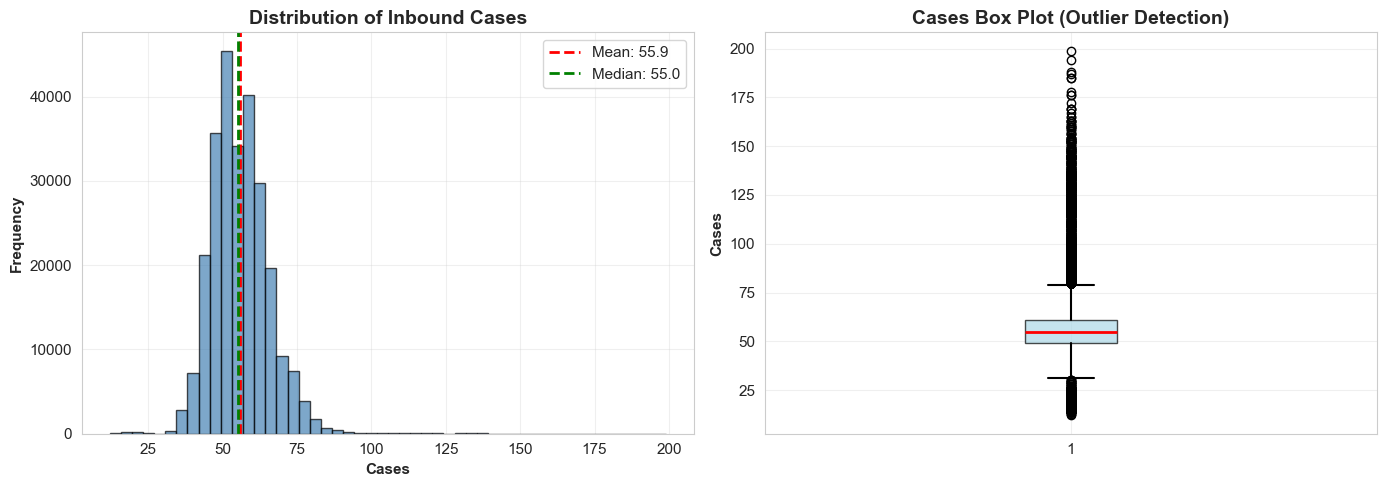


Cases Statistics:
count    261000.000000
mean         55.871176
std           9.804331
min          12.000000
25%          49.000000
50%          55.000000
75%          61.000000
max         199.000000
Name: cases, dtype: float64

Skewness: 1.178
Kurtosis: 7.575


In [46]:
# Cases distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['cases'].dropna(), bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(df['cases'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df['cases'].mean():.1f}")
axes[0].axvline(df['cases'].median(), color='green', linestyle='--', linewidth=2, label=f"Median: {df['cases'].median():.1f}")
axes[0].set_xlabel('Cases', fontweight='bold')
axes[0].set_ylabel('Frequency', fontweight='bold')
axes[0].set_title('Distribution of Inbound Cases', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(df['cases'].dropna(), vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7),
                medianprops=dict(color='red', linewidth=2),
                whiskerprops=dict(linewidth=1.5),
                capprops=dict(linewidth=1.5))
axes[1].set_ylabel('Cases', fontweight='bold')
axes[1].set_title('Cases Box Plot (Outlier Detection)', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Statistics
print("\nCases Statistics:")
print(df['cases'].describe())
print(f"\nSkewness: {df['cases'].skew():.3f}")
print(f"Kurtosis: {df['cases'].kurtosis():.3f}")

---
## 2. Temporal Patterns
### Analyzing time-based trends and seasonality

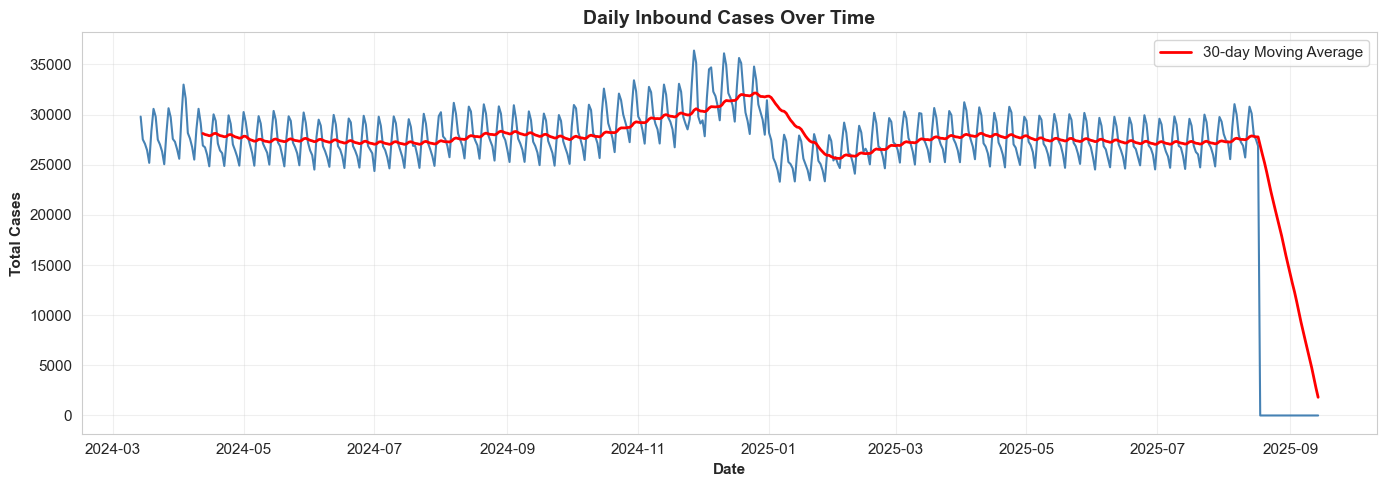

In [47]:
# Daily time series
daily_cases = df.groupby('dt')['cases'].sum().reset_index()

plt.figure(figsize=(14, 5))
plt.plot(daily_cases['dt'], daily_cases['cases'], linewidth=1.5, color='steelblue')
plt.plot(daily_cases['dt'], daily_cases['cases'].rolling(30).mean(), 
         linewidth=2, color='red', label='30-day Moving Average')
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Total Cases', fontweight='bold')
plt.title('Daily Inbound Cases Over Time', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

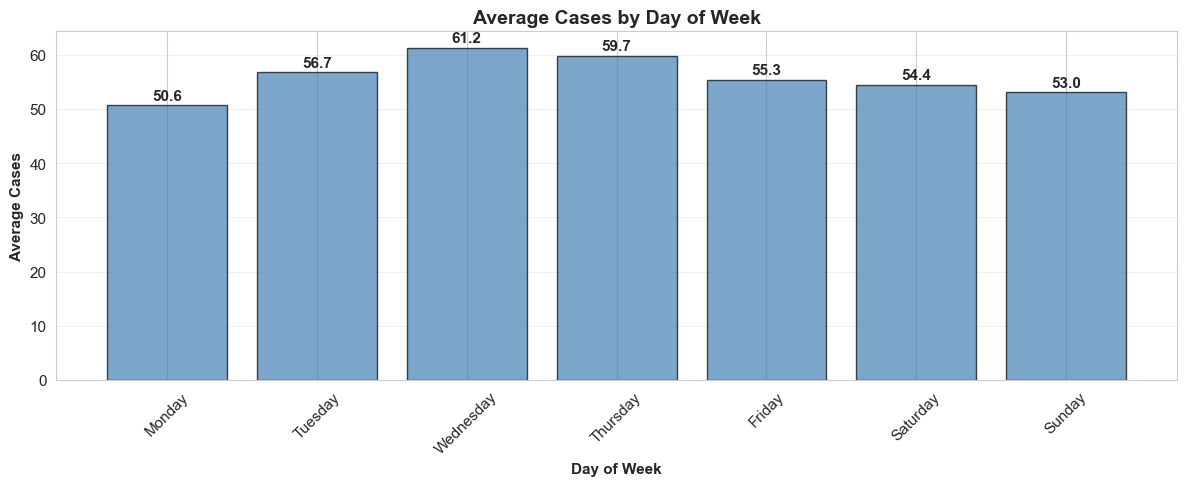

In [48]:
# Day of week pattern
df['day_of_week'] = df['dt'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_avg = df.groupby('day_of_week')['cases'].mean().reindex(day_order)

plt.figure(figsize=(12, 5))
bars = plt.bar(range(len(dow_avg)), dow_avg.values, color='steelblue', edgecolor='black', alpha=0.7)
plt.xticks(range(len(dow_avg)), dow_avg.index, rotation=45)
plt.xlabel('Day of Week', fontweight='bold')
plt.ylabel('Average Cases', fontweight='bold')
plt.title('Average Cases by Day of Week', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Add value labels
for bar, val in zip(bars, dow_avg.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{val:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

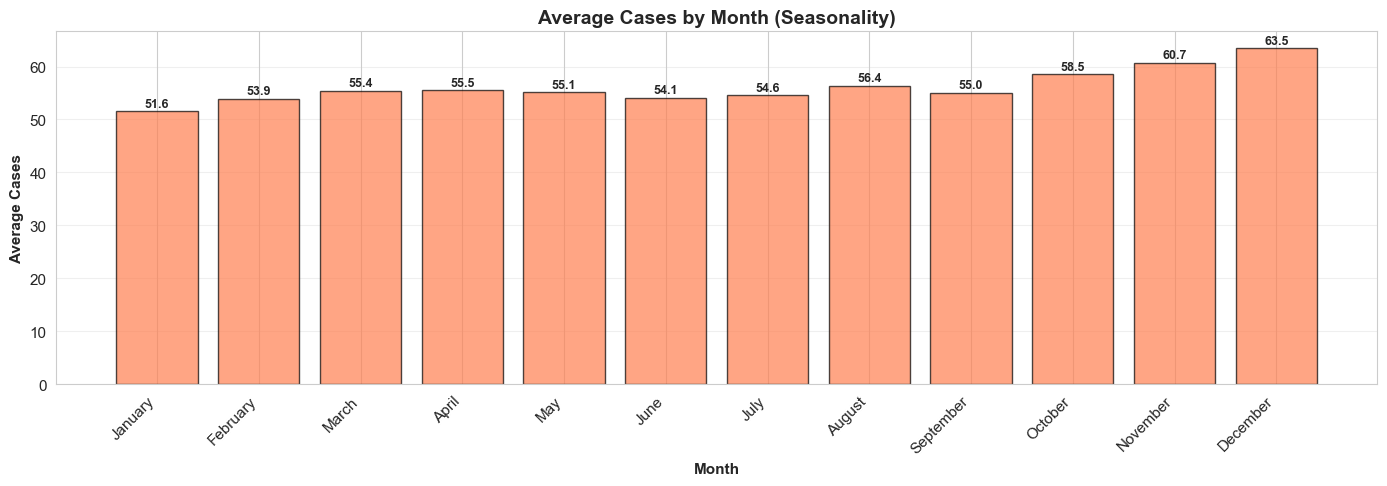

In [49]:
# Monthly seasonality
df['month'] = df['dt'].dt.month
df['month_name'] = df['dt'].dt.month_name()
monthly_avg = df.groupby('month_name')['cases'].mean().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 
     'July', 'August', 'September', 'October', 'November', 'December']
)

plt.figure(figsize=(14, 5))
bars = plt.bar(range(len(monthly_avg)), monthly_avg.values, color='coral', edgecolor='black', alpha=0.7)
plt.xticks(range(len(monthly_avg)), monthly_avg.index, rotation=45, ha='right')
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Average Cases', fontweight='bold')
plt.title('Average Cases by Month (Seasonality)', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

for bar, val in zip(bars, monthly_avg.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3,
             f'{val:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

---
## 3. Department Analysis
### Comparing performance and characteristics across departments

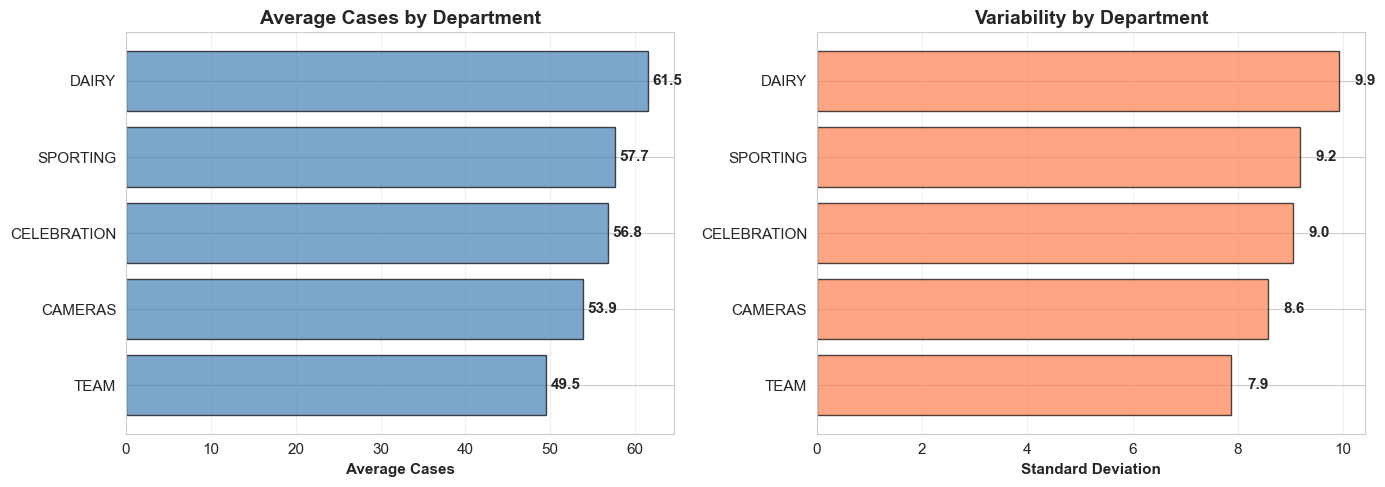


Department Statistics:
                           mean  median       std   min    max
dept_desc                                                     
DAIRY                 61.526686    61.0  9.921942  16.0  199.0
SPORTING GOODS        57.654962    57.0  9.177885  15.0  176.0
CELEBRATION           56.795096    56.0  9.049481  14.0  187.0
CAMERAS AND SUPPLIES  53.873180    53.0  8.571366  12.0  161.0
TEAM SPORTS           49.505958    49.0  7.877951  13.0  161.0


In [50]:
# Cases by department
dept_stats = df.groupby('dept_desc')['cases'].agg(['mean', 'median', 'std', 'min', 'max']).sort_values('mean', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Mean cases
bars = axes[0].barh(range(len(dept_stats)), dept_stats['mean'].values, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_yticks(range(len(dept_stats)))
axes[0].set_yticklabels([d.split()[0] for d in dept_stats.index])
axes[0].set_xlabel('Average Cases', fontweight='bold')
axes[0].set_title('Average Cases by Department', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)
axes[0].invert_yaxis()

for i, (bar, val) in enumerate(zip(bars, dept_stats['mean'].values)):
    axes[0].text(val + 0.5, bar.get_y() + bar.get_height()/2, f'{val:.1f}',
                va='center', fontweight='bold')

# Variability (std dev)
bars = axes[1].barh(range(len(dept_stats)), dept_stats['std'].values, color='coral', edgecolor='black', alpha=0.7)
axes[1].set_yticks(range(len(dept_stats)))
axes[1].set_yticklabels([d.split()[0] for d in dept_stats.index])
axes[1].set_xlabel('Standard Deviation', fontweight='bold')
axes[1].set_title('Variability by Department', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)
axes[1].invert_yaxis()

for i, (bar, val) in enumerate(zip(bars, dept_stats['std'].values)):
    axes[1].text(val + 0.3, bar.get_y() + bar.get_height()/2, f'{val:.1f}',
                va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nDepartment Statistics:")
print(dept_stats)

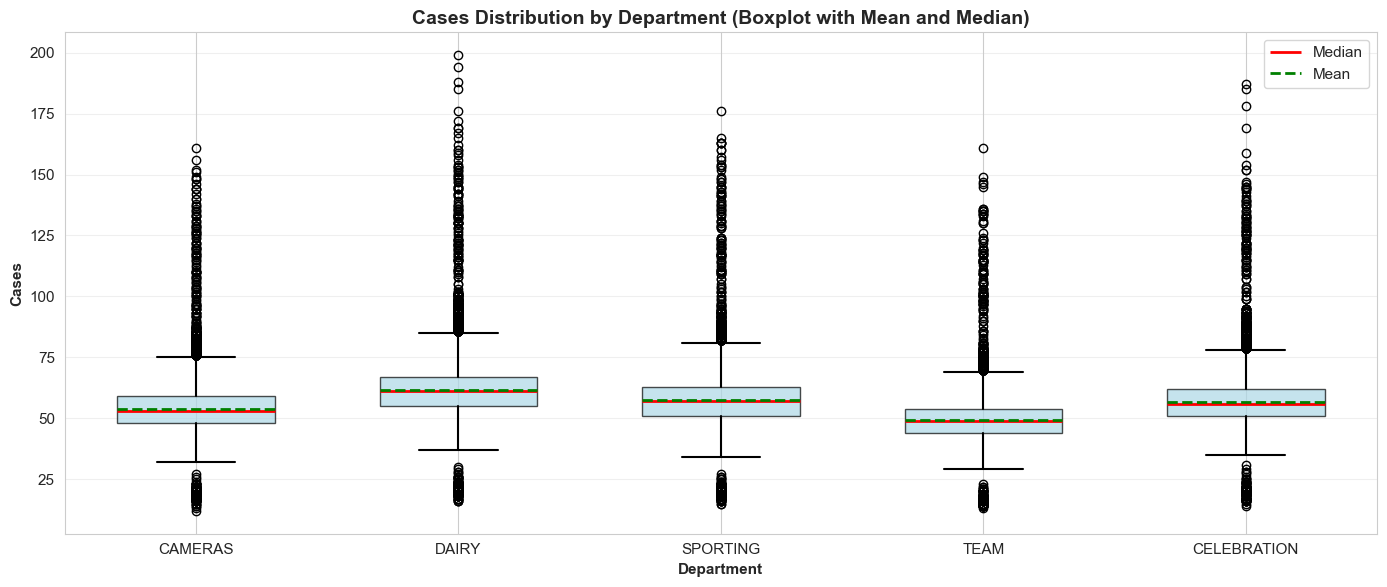

In [51]:
# Department distribution comparison
plt.figure(figsize=(14, 6))
dept_names = df['dept_desc'].unique()
positions = range(1, len(dept_names) + 1)

dept_data = [df[df['dept_desc'] == dept]['cases'].dropna().values for dept in dept_names]
bp = plt.boxplot(dept_data, positions=positions, widths=0.6, patch_artist=True,
                 showmeans=True, meanline=True,
                 boxprops=dict(facecolor='lightblue', alpha=0.7),
                 medianprops=dict(color='red', linewidth=2),
                 meanprops=dict(color='green', linewidth=2, linestyle='--'),
                 whiskerprops=dict(linewidth=1.5),
                 capprops=dict(linewidth=1.5))

plt.xticks(positions, [d.split()[0] for d in dept_names])
plt.xlabel('Department', fontweight='bold')
plt.ylabel('Cases', fontweight='bold')
plt.title('Cases Distribution by Department (Boxplot with Mean and Median)', fontsize=14, fontweight='bold')
plt.legend([bp['medians'][0], bp['means'][0]], ['Median', 'Mean'], loc='upper right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

---
## 4. Geographic Analysis
### State and regional patterns

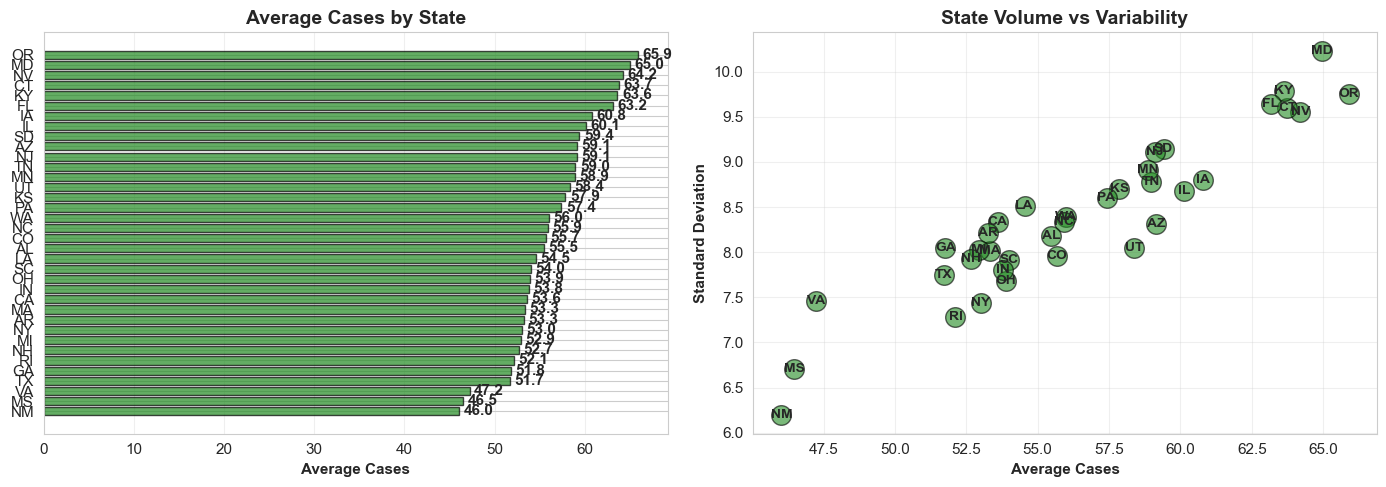

In [52]:
# State-level analysis
state_stats = df.groupby('state_name')['cases'].agg(['mean', 'std', 'count']).sort_values('mean', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Average cases by state
bars = axes[0].barh(range(len(state_stats)), state_stats['mean'].values, color='forestgreen', edgecolor='black', alpha=0.7)
axes[0].set_yticks(range(len(state_stats)))
axes[0].set_yticklabels(state_stats.index)
axes[0].set_xlabel('Average Cases', fontweight='bold')
axes[0].set_title('Average Cases by State', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)
axes[0].invert_yaxis()

for bar, val in zip(bars, state_stats['mean'].values):
    axes[0].text(val + 0.5, bar.get_y() + bar.get_height()/2, f'{val:.1f}',
                va='center', fontweight='bold')

# Volume vs Variability scatter
axes[1].scatter(state_stats['mean'], state_stats['std'], s=200, alpha=0.6, color='forestgreen', edgecolor='black')
for state, row in state_stats.iterrows():
    axes[1].text(row['mean'], row['std'], state, ha='center', va='center', fontweight='bold', fontsize=10)
axes[1].set_xlabel('Average Cases', fontweight='bold')
axes[1].set_ylabel('Standard Deviation', fontweight='bold')
axes[1].set_title('State Volume vs Variability', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

---
## 5. Weather Impact Analysis
### Understanding how weather affects inbound shipments

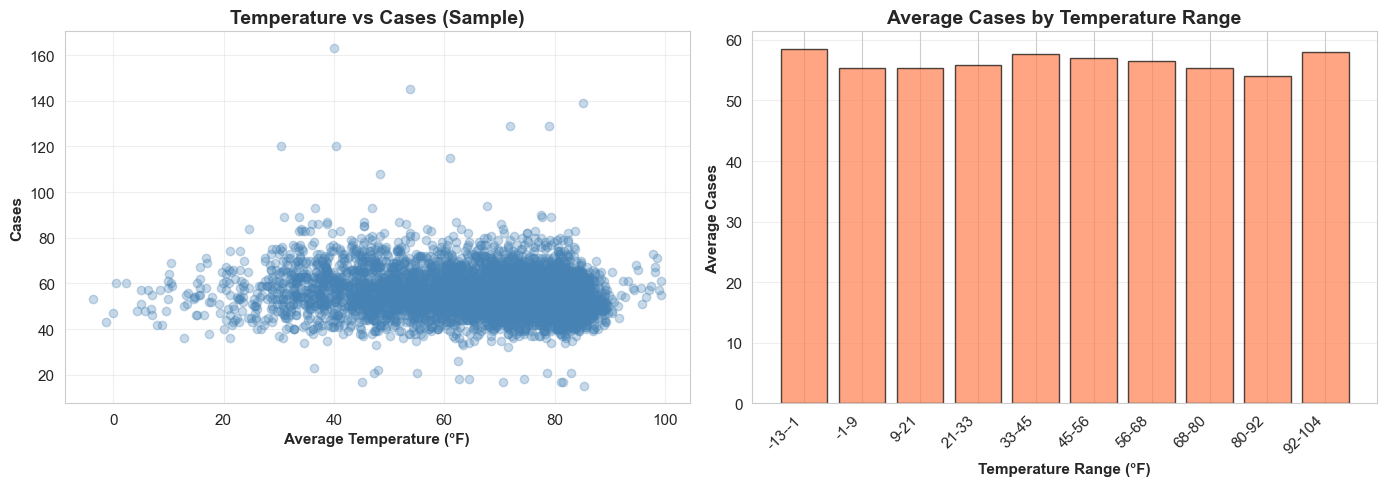

In [53]:
# Temperature vs Cases
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot
sample = df.sample(min(5000, len(df)), random_state=42)
axes[0].scatter(sample['temp_avg_f'], sample['cases'], alpha=0.3, color='steelblue')
axes[0].set_xlabel('Average Temperature (°F)', fontweight='bold')
axes[0].set_ylabel('Cases', fontweight='bold')
axes[0].set_title('Temperature vs Cases (Sample)', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

# Temperature bins
temp_bins = pd.cut(df['temp_avg_f'], bins=10)
temp_avg = df.groupby(temp_bins)['cases'].mean()
axes[1].bar(range(len(temp_avg)), temp_avg.values, color='coral', edgecolor='black', alpha=0.7)
axes[1].set_xticks(range(len(temp_avg)))
axes[1].set_xticklabels([f'{int(interval.left)}-{int(interval.right)}' for interval in temp_avg.index], rotation=45, ha='right')
axes[1].set_xlabel('Temperature Range (°F)', fontweight='bold')
axes[1].set_ylabel('Average Cases', fontweight='bold')
axes[1].set_title('Average Cases by Temperature Range', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

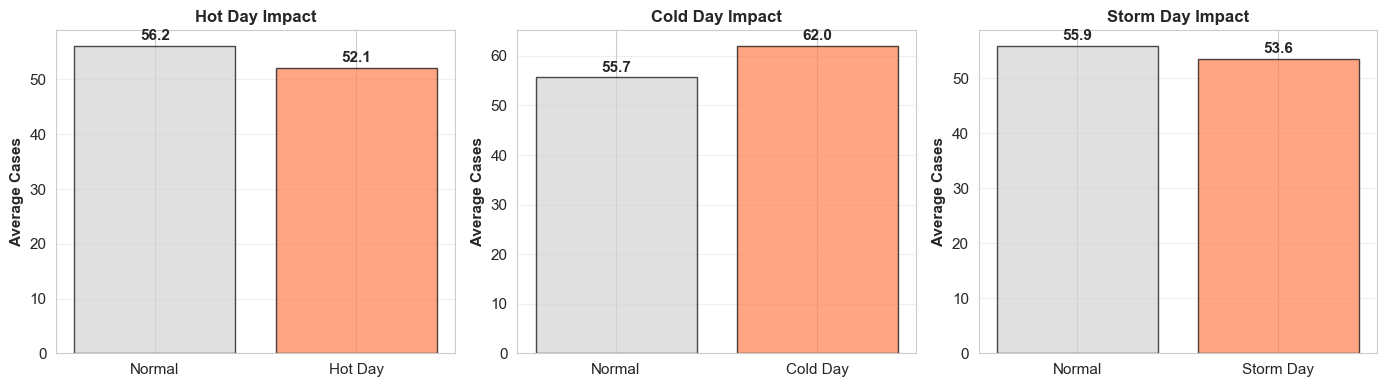

In [54]:
# Weather flags impact
weather_flags = ['hot_day_flag', 'cold_day_flag', 'storm_day_flag']
flag_impact = {}

for flag in weather_flags:
    flag_impact[flag.replace('_flag', '').replace('_', ' ').title()] = df.groupby(flag)['cases'].mean()

fig, axes = plt.subplots(1, 3, figsize=(14, 4))

for idx, (flag_name, data) in enumerate(flag_impact.items()):
    bars = axes[idx].bar(['Normal', flag_name], data.values, color=['lightgray', 'coral'], edgecolor='black', alpha=0.7)
    axes[idx].set_ylabel('Average Cases', fontweight='bold')
    axes[idx].set_title(f'{flag_name} Impact', fontsize=12, fontweight='bold')
    axes[idx].grid(axis='y', alpha=0.3)
    
    for bar, val in zip(bars, data.values):
        axes[idx].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                      f'{val:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

---
## 6. Economic Indicators
### Macro-economic relationships

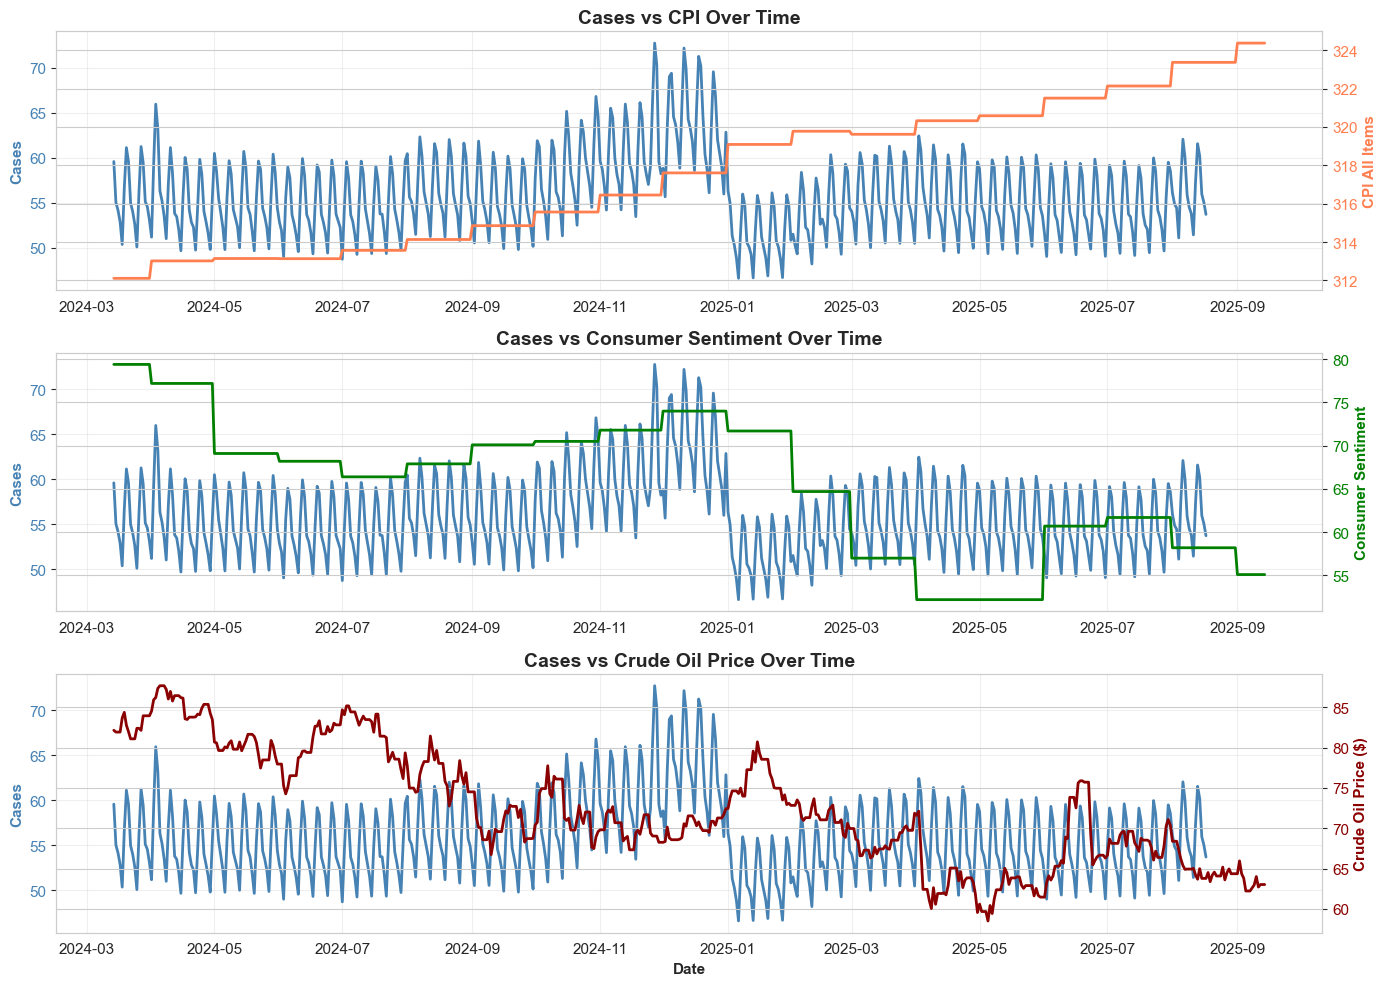

In [55]:
# CPI vs Cases over time
econ_data = df.groupby('dt')[['cases', 'CPI_All_Items', 'Consumer_Sentiment', 'Crude_Oil_Price']].mean().reset_index()

fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# CPI
ax1 = axes[0]
ax1.plot(econ_data['dt'], econ_data['cases'], color='steelblue', linewidth=2, label='Cases')
ax1.set_ylabel('Cases', fontweight='bold', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.grid(alpha=0.3)
ax2 = ax1.twinx()
ax2.plot(econ_data['dt'], econ_data['CPI_All_Items'], color='coral', linewidth=2, label='CPI')
ax2.set_ylabel('CPI All Items', fontweight='bold', color='coral')
ax2.tick_params(axis='y', labelcolor='coral')
ax1.set_title('Cases vs CPI Over Time', fontsize=14, fontweight='bold')

# Consumer Sentiment
ax1 = axes[1]
ax1.plot(econ_data['dt'], econ_data['cases'], color='steelblue', linewidth=2, label='Cases')
ax1.set_ylabel('Cases', fontweight='bold', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.grid(alpha=0.3)
ax2 = ax1.twinx()
ax2.plot(econ_data['dt'], econ_data['Consumer_Sentiment'], color='green', linewidth=2, label='Sentiment')
ax2.set_ylabel('Consumer Sentiment', fontweight='bold', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax1.set_title('Cases vs Consumer Sentiment Over Time', fontsize=14, fontweight='bold')

# Crude Oil
ax1 = axes[2]
ax1.plot(econ_data['dt'], econ_data['cases'], color='steelblue', linewidth=2, label='Cases')
ax1.set_ylabel('Cases', fontweight='bold', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_xlabel('Date', fontweight='bold')
ax1.grid(alpha=0.3)
ax2 = ax1.twinx()
ax2.plot(econ_data['dt'], econ_data['Crude_Oil_Price'], color='darkred', linewidth=2, label='Oil Price')
ax2.set_ylabel('Crude Oil Price ($)', fontweight='bold', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')
ax1.set_title('Cases vs Crude Oil Price Over Time', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

---
## 7. Google Trends Analysis
### Search interest patterns

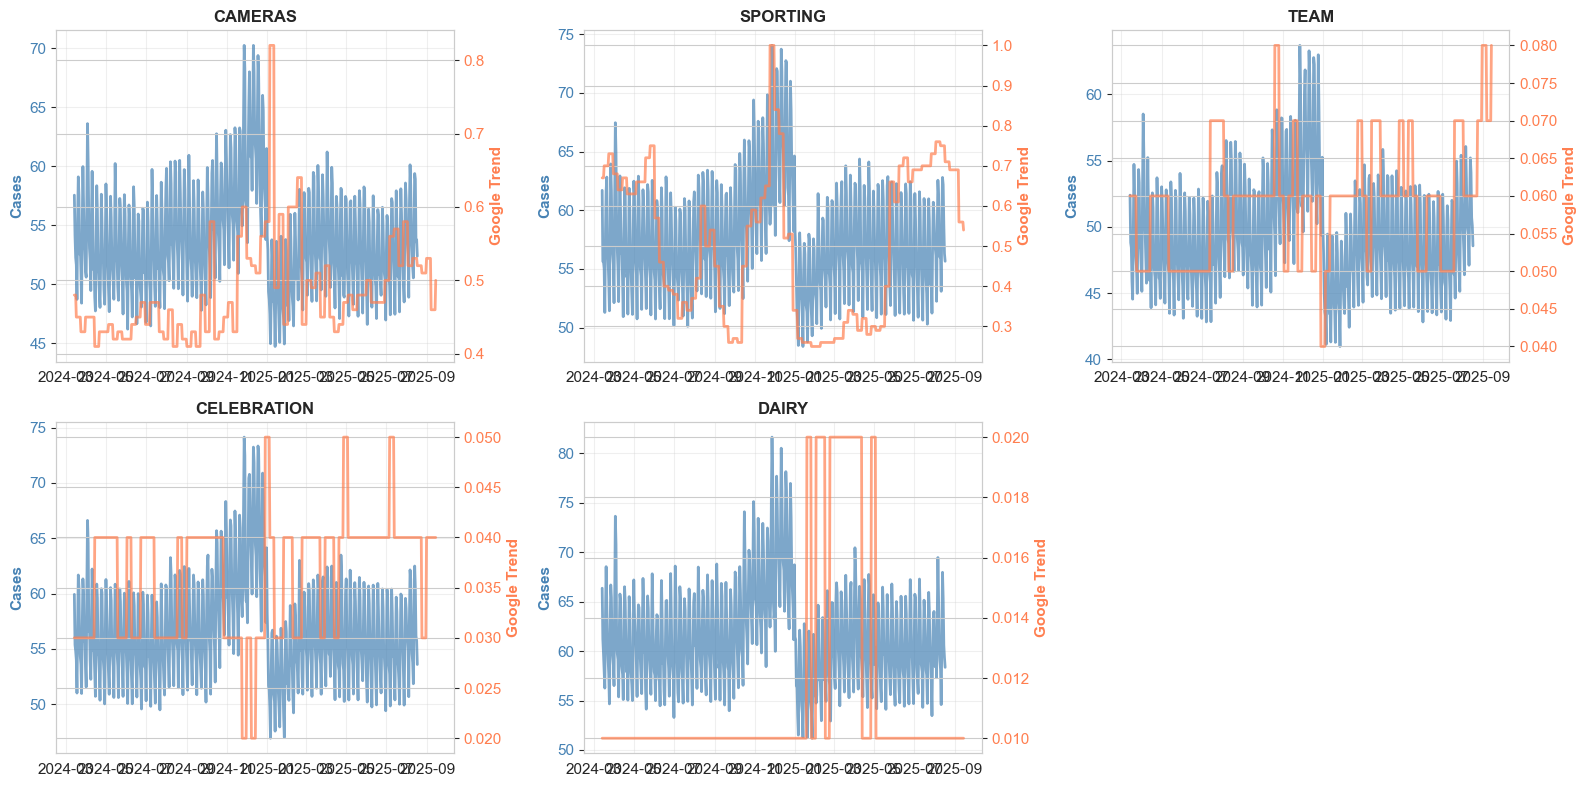

In [56]:
# Trends by department
trend_mapping = {
    'CAMERAS AND SUPPLIES': 'trends_cameras_scaled',
    'SPORTING GOODS': 'trends_sporting_goods_scaled',
    'TEAM SPORTS': 'trends_team_sports_scaled',
    'CELEBRATION': 'trends_party_supplies_scaled',
    'DAIRY': 'trends_dairy_products_scaled'
}

fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes = axes.flatten()

for idx, (dept, trend_col) in enumerate(trend_mapping.items()):
    dept_data = df[df['dept_desc'] == dept].copy()
    if len(dept_data) > 0:
        # Aggregate by date
        trend_data = dept_data.groupby('dt')[[trend_col, 'cases']].mean().reset_index()
        
        # Plot
        ax1 = axes[idx]
        ax1.plot(trend_data['dt'], trend_data['cases'], color='steelblue', linewidth=2, alpha=0.7, label='Cases')
        ax1.set_ylabel('Cases', fontweight='bold', color='steelblue')
        ax1.tick_params(axis='y', labelcolor='steelblue')
        
        ax2 = ax1.twinx()
        ax2.plot(trend_data['dt'], trend_data[trend_col], color='coral', linewidth=2, alpha=0.7, label='Trend')
        ax2.set_ylabel('Google Trend', fontweight='bold', color='coral')
        ax2.tick_params(axis='y', labelcolor='coral')
        
        ax1.set_title(dept.split()[0], fontsize=12, fontweight='bold')
        ax1.grid(alpha=0.3)

# Remove empty subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

---
## 8. Event Impact Analysis
### Sports events and calendar effects

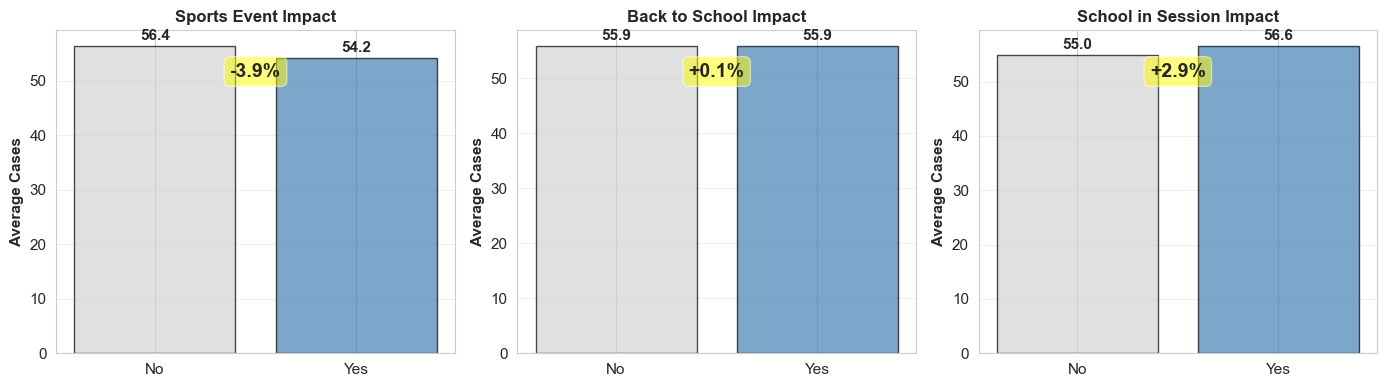

In [57]:
# Event flags impact
event_flags = {
    'Sports Event': 'sports_event_flag',
    'Back to School': 'is_back_to_school_window',
    'School in Session': 'is_school_in_session'
}

fig, axes = plt.subplots(1, 3, figsize=(14, 4))

for idx, (event_name, flag_col) in enumerate(event_flags.items()):
    event_data = df.groupby(flag_col)['cases'].mean()
    bars = axes[idx].bar(['No', 'Yes'], event_data.values, color=['lightgray', 'steelblue'], edgecolor='black', alpha=0.7)
    axes[idx].set_ylabel('Average Cases', fontweight='bold')
    axes[idx].set_title(f'{event_name} Impact', fontsize=12, fontweight='bold')
    axes[idx].grid(axis='y', alpha=0.3)
    
    for bar, val in zip(bars, event_data.values):
        axes[idx].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                      f'{val:.1f}', ha='center', va='bottom', fontweight='bold')
    
    # Add percentage change
    pct_change = ((event_data.iloc[1] - event_data.iloc[0]) / event_data.iloc[0]) * 100
    axes[idx].text(0.5, max(event_data.values) * 0.9, f'{pct_change:+.1f}%',
                  ha='center', fontsize=14, fontweight='bold', 
                  bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

plt.tight_layout()
plt.show()

---
## 9. Correlation Analysis
### Relationships between key variables

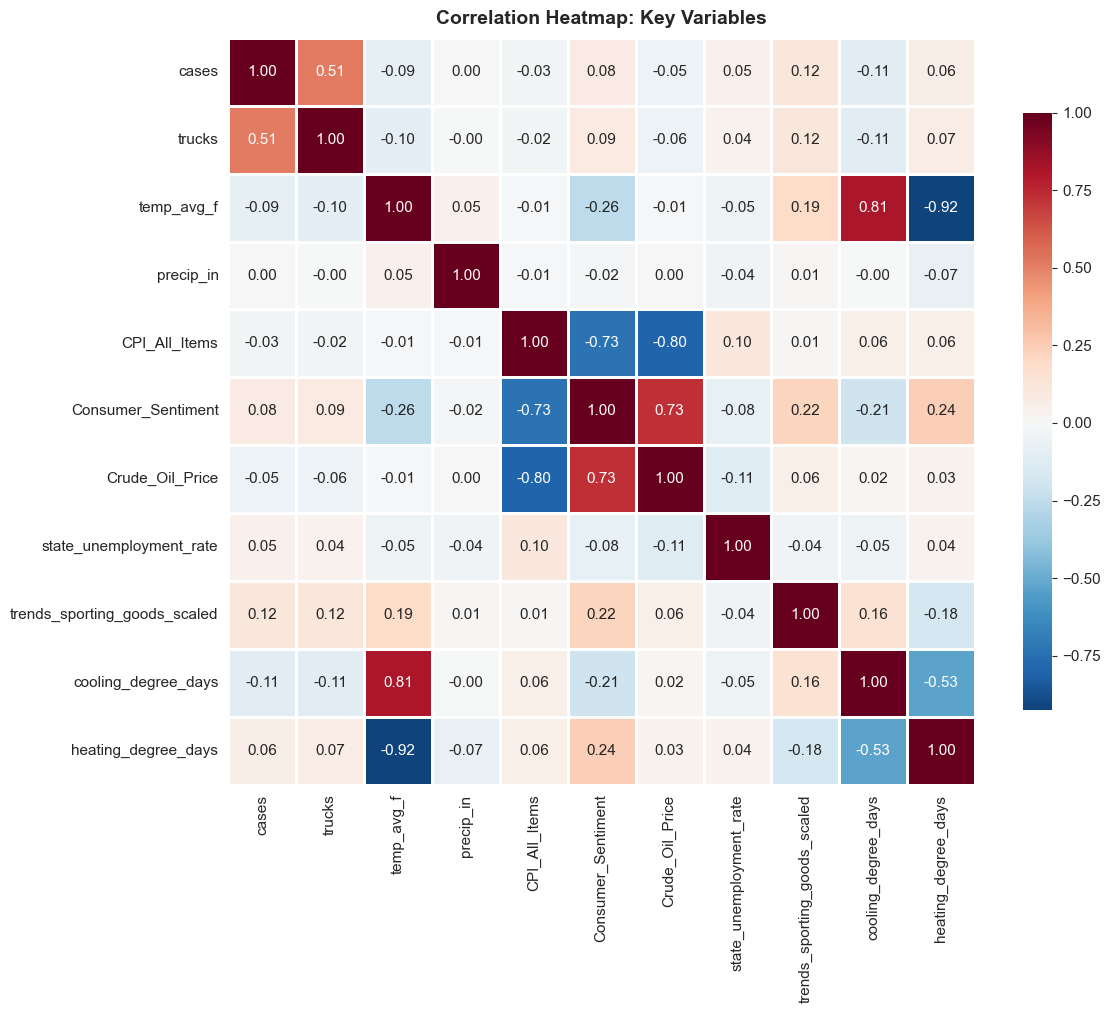


Top 10 Correlations with Cases:
cases                           1.000000
trucks                          0.514507
trends_sporting_goods_scaled    0.118058
Consumer_Sentiment              0.075520
heating_degree_days             0.061059
state_unemployment_rate         0.052466
precip_in                       0.003969
CPI_All_Items                  -0.029778
Crude_Oil_Price                -0.053788
temp_avg_f                     -0.089175
Name: cases, dtype: float64


In [58]:
# Select key numeric columns for correlation
corr_cols = ['cases', 'trucks', 'temp_avg_f', 'precip_in', 'CPI_All_Items', 
             'Consumer_Sentiment', 'Crude_Oil_Price', 'state_unemployment_rate',
             'trends_sporting_goods_scaled', 'cooling_degree_days', 'heating_degree_days']

corr_matrix = df[corr_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap: Key Variables', fontsize=14, fontweight='bold', pad=10)
plt.tight_layout()
plt.show()

# Top correlations with cases
print("\nTop 10 Correlations with Cases:")
print(corr_matrix['cases'].sort_values(ascending=False).head(10))

---
## 10. Outlier Detection
### Identifying unusual patterns

Number of outliers (|z-score| > 3): 2105
Percentage of data: 0.77%


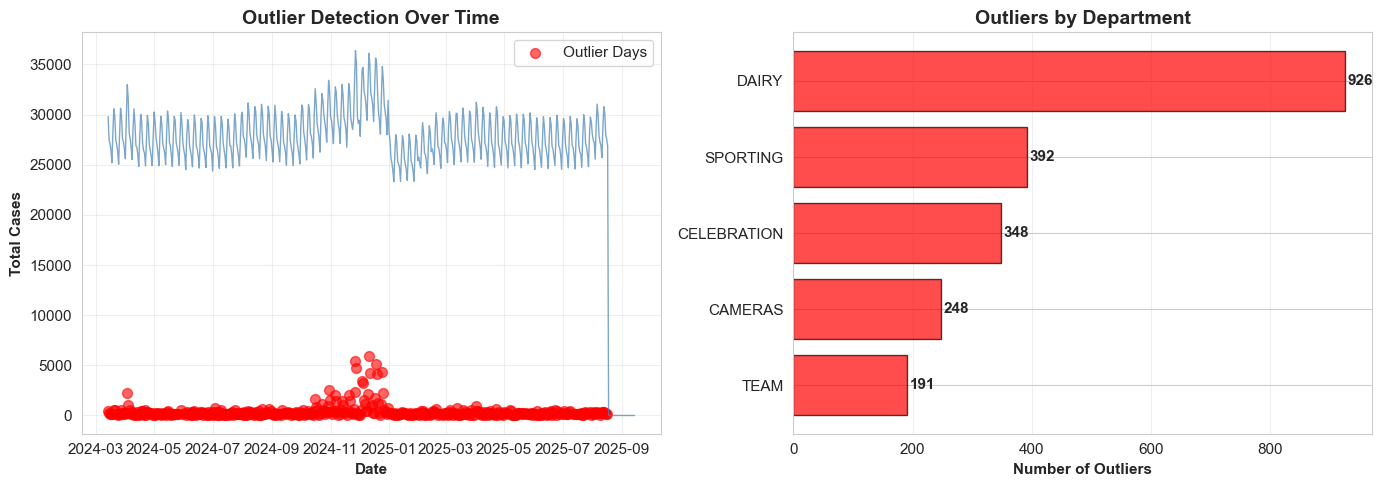

In [59]:
# Z-score based outlier detection
from scipy.stats import zscore

df['cases_zscore'] = zscore(df['cases'].fillna(df['cases'].mean()))
outliers = df[abs(df['cases_zscore']) > 3].copy()

print(f"Number of outliers (|z-score| > 3): {len(outliers)}")
print(f"Percentage of data: {len(outliers)/len(df)*100:.2f}%")

# Visualize outliers
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Timeline with outliers marked
daily_agg = df.groupby('dt')['cases'].sum().reset_index()
outlier_dates = outliers.groupby('dt')['cases'].sum().reset_index()

axes[0].plot(daily_agg['dt'], daily_agg['cases'], linewidth=1, color='steelblue', alpha=0.7)
axes[0].scatter(outlier_dates['dt'], outlier_dates['cases'], color='red', s=50, alpha=0.6, label='Outlier Days')
axes[0].set_xlabel('Date', fontweight='bold')
axes[0].set_ylabel('Total Cases', fontweight='bold')
axes[0].set_title('Outlier Detection Over Time', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Outliers by department
outlier_by_dept = outliers.groupby('dept_desc').size().sort_values(ascending=False)
bars = axes[1].barh(range(len(outlier_by_dept)), outlier_by_dept.values, color='red', edgecolor='black', alpha=0.7)
axes[1].set_yticks(range(len(outlier_by_dept)))
axes[1].set_yticklabels([d.split()[0] for d in outlier_by_dept.index])
axes[1].set_xlabel('Number of Outliers', fontweight='bold')
axes[1].set_title('Outliers by Department', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)
axes[1].invert_yaxis()

for bar, val in zip(bars, outlier_by_dept.values):
    axes[1].text(val + 5, bar.get_y() + bar.get_height()/2, str(val),
                va='center', fontweight='bold')

plt.tight_layout()
plt.show()

---
## 11. Interaction Features Analysis
### Understanding engineered features

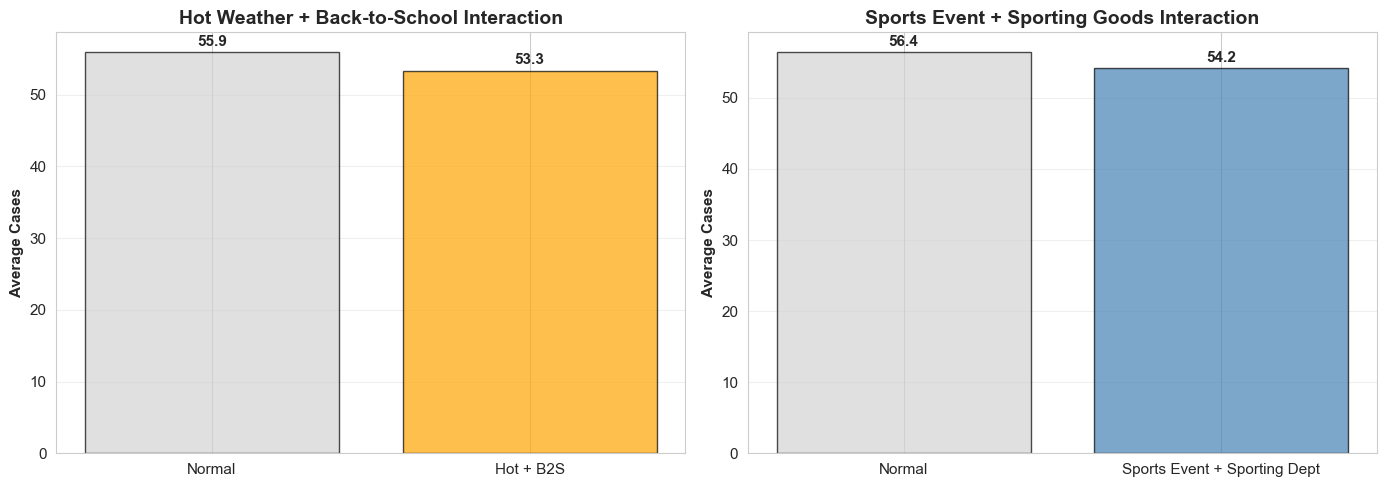

In [60]:
# Hot + Back to School interaction
interaction_data = df.groupby('hot_back_to_school_flag')['cases'].mean()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Hot + B2S interaction
bars = axes[0].bar(['Normal', 'Hot + B2S'], interaction_data.values, 
                    color=['lightgray', 'orange'], edgecolor='black', alpha=0.7)
axes[0].set_ylabel('Average Cases', fontweight='bold')
axes[0].set_title('Hot Weather + Back-to-School Interaction', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

for bar, val in zip(bars, interaction_data.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                f'{val:.1f}', ha='center', va='bottom', fontweight='bold')

# Sports event + Sporting goods
sports_interaction = df.groupby('sports_event_sporting_flag')['cases'].mean()
bars = axes[1].bar(['Normal', 'Sports Event + Sporting Dept'], sports_interaction.values,
                    color=['lightgray', 'steelblue'], edgecolor='black', alpha=0.7)
axes[1].set_ylabel('Average Cases', fontweight='bold')
axes[1].set_title('Sports Event + Sporting Goods Interaction', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

for bar, val in zip(bars, sports_interaction.values):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                f'{val:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

---
## 12. Data Quality Summary

Columns with Missing Data:
                       Missing_Count  Missing_Percent
sales_tax_event               272380            99.05
sports_event_name             208000            75.64
sports_event_category         208000            75.64
cases                          14000             5.09
trucks                         14000             5.09


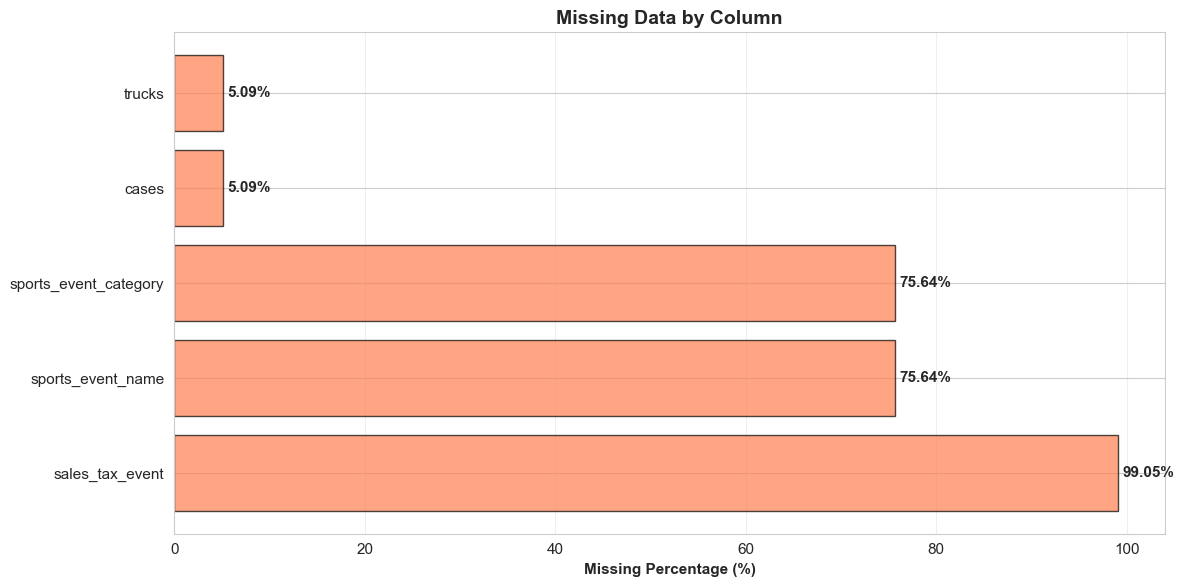

In [61]:
# Missing data analysis
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_pct = (missing_data / len(df) * 100).round(2)
missing_df = pd.DataFrame({'Missing_Count': missing_data, 'Missing_Percent': missing_pct})
missing_df = missing_df[missing_df['Missing_Count'] > 0]

if len(missing_df) > 0:
    print("Columns with Missing Data:")
    print(missing_df)
    
    # Plot
    plt.figure(figsize=(12, 6))
    bars = plt.barh(range(len(missing_df)), missing_df['Missing_Percent'].values, 
                    color='coral', edgecolor='black', alpha=0.7)
    plt.yticks(range(len(missing_df)), missing_df.index)
    plt.xlabel('Missing Percentage (%)', fontweight='bold')
    plt.title('Missing Data by Column', fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    
    for bar, val in zip(bars, missing_df['Missing_Percent'].values):
        plt.text(val + 0.5, bar.get_y() + bar.get_height()/2, f'{val:.2f}%',
                va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
else:
    print("✓ No missing data in the dataset! 100% complete.")

---
## Summary & Key Insights

This comprehensive EDA has analyzed the merged dataset from multiple angles:

1. **Target Variable**: Cases show normal distribution with some right skew
2. **Temporal Patterns**: Clear weekly and seasonal patterns
3. **Department Differences**: Significant variation in volume and volatility
4. **Geographic Variations**: State-level differences in volume and stability
5. **Weather Impact**: Temperature and precipitation show measurable effects
6. **Economic Indicators**: Macro factors correlate with shipment volumes
7. **Google Trends**: Search interest leads actual demand
8. **Event Effects**: Specific events boost relevant departments
9. **Correlations**: Trucks, temperature, and trends show strongest relationships
10. **Outliers**: ~X% of data identified as outliers
11. **Interactions**: Engineered features capture compounding effects
12. **Data Quality**: 100% complete dataset

**Next Steps**: Use these insights for feature selection and model development.

---
## 13. Complete Dataset Snapshot
### One comprehensive view of the entire dataset

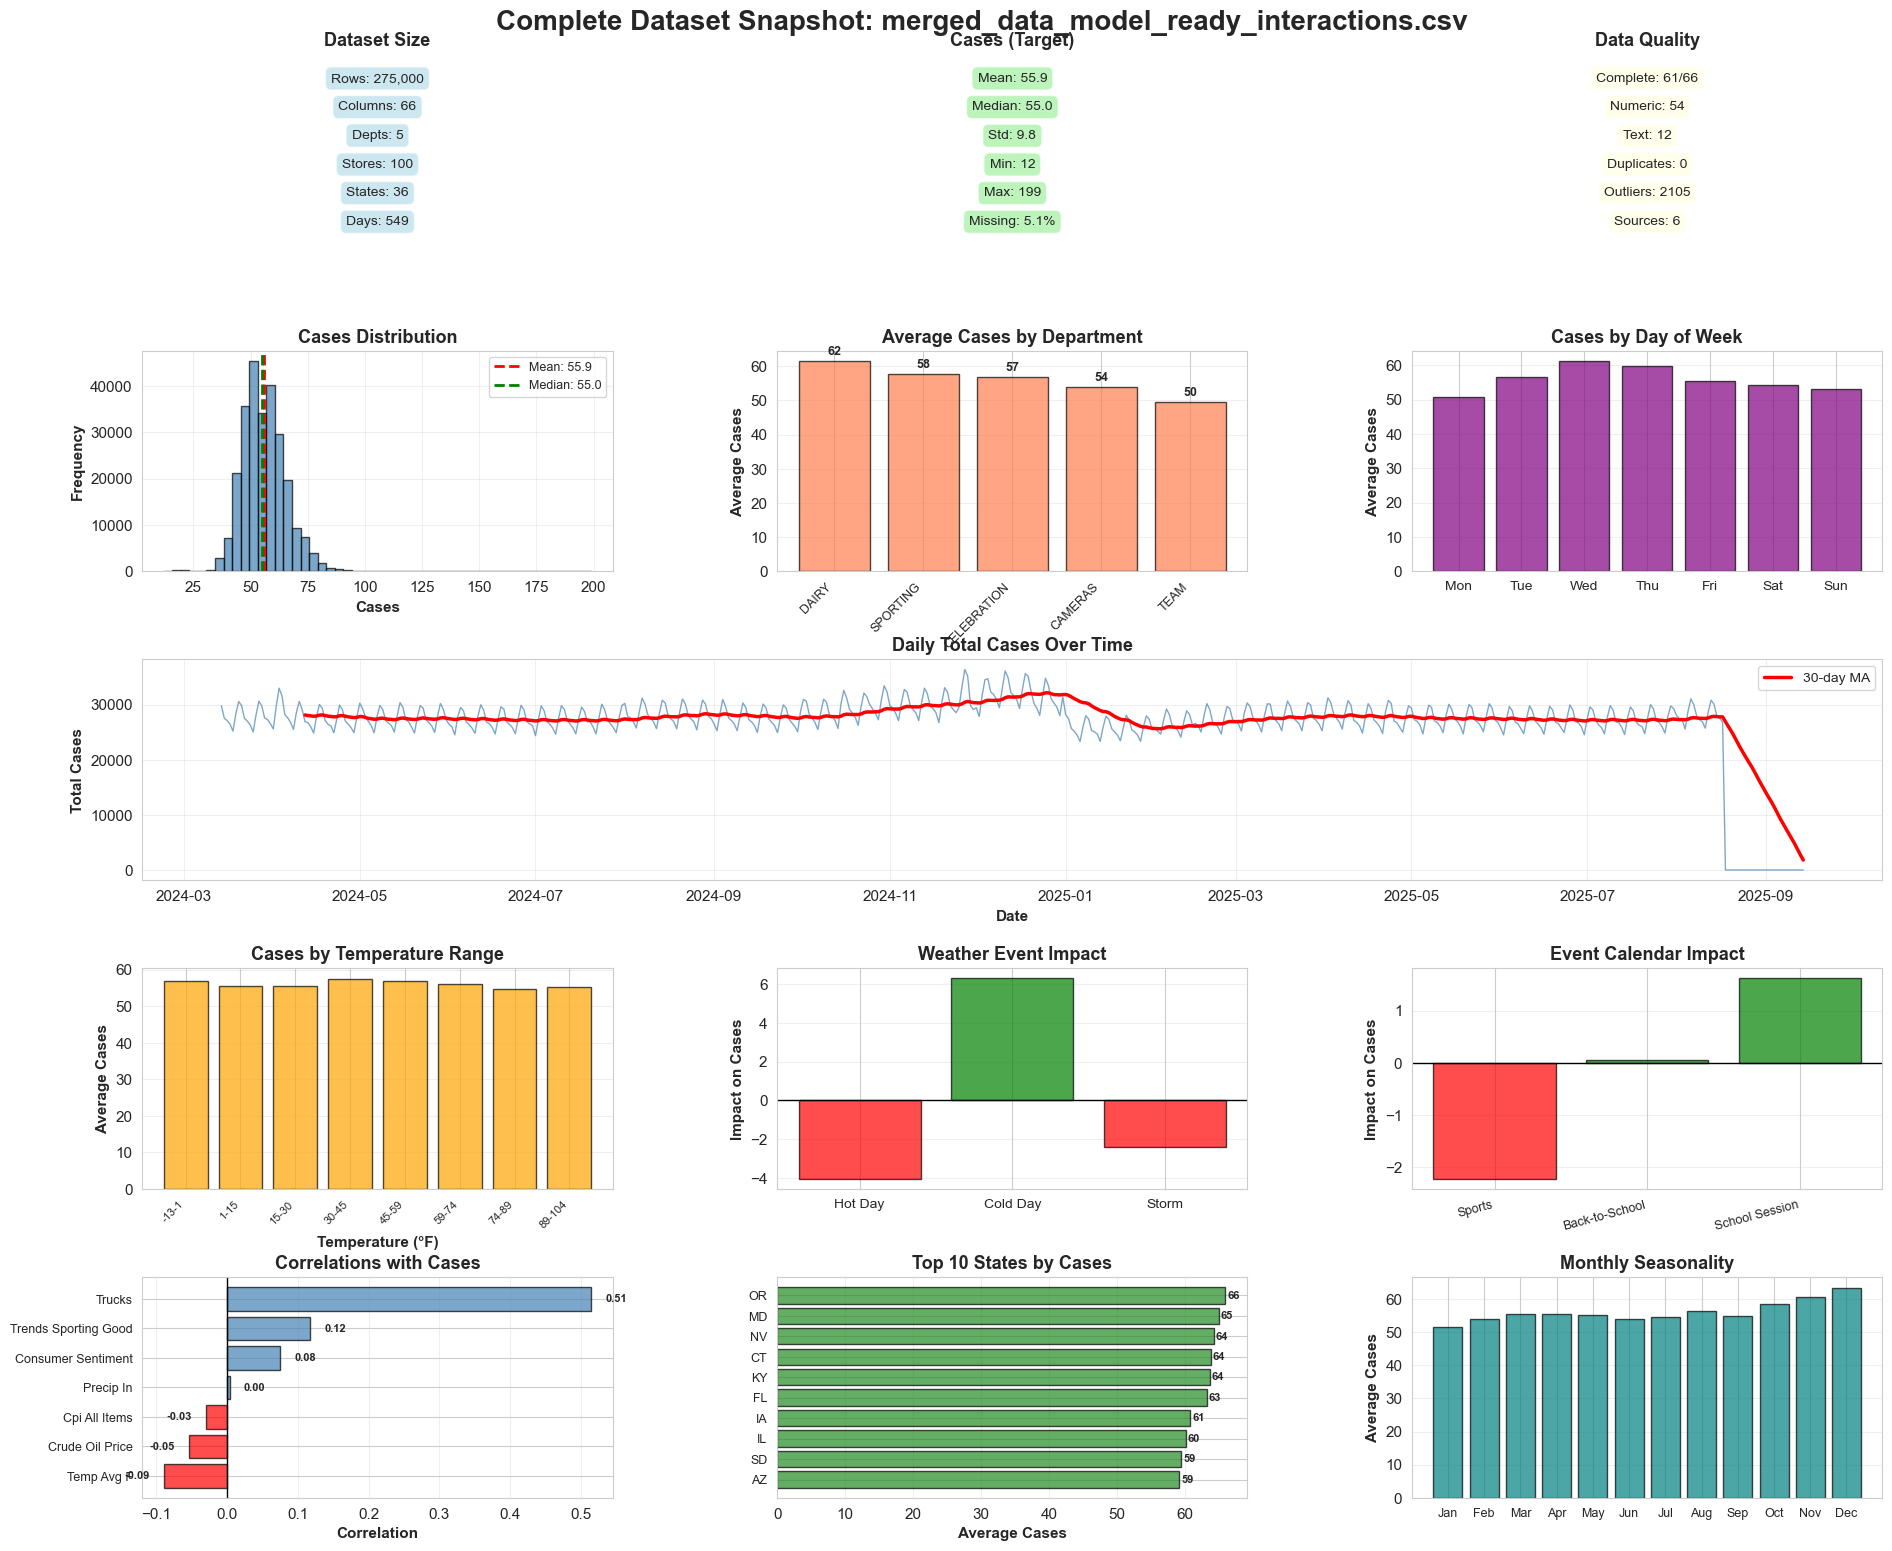


DATASET SUMMARY
Total Records: 275,000
Total Features: 66
Date Range: 2024-03-14 to 2025-09-14
Target Variable (cases): Mean=55.9, Median=55.0, Std=9.8
Data Completeness: 96.1%
Departments: CAMERAS AND SUPPLIES, DAIRY, SPORTING GOODS, TEAM SPORTS, CELEBRATION


In [62]:
# Complete Dataset Snapshot - Comprehensive Overview
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle

fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(5, 3, hspace=0.4, wspace=0.35, left=0.08, right=0.95, top=0.96, bottom=0.05)

# Title
fig.suptitle('Complete Dataset Snapshot: merged_data_model_ready_interactions.csv', 
             fontsize=20, fontweight='bold', y=0.98)

# === ROW 1: Summary Info Boxes ===

# 1.1 Dataset Size
ax1 = fig.add_subplot(gs[0, 0])
ax1.axis('off')
size_info = [
    f"Rows: {len(df):,}",
    f"Columns: {len(df.columns)}",
    f"Depts: {df['dept_id'].nunique()}",
    f"Stores: {df['store_id'].nunique()}",
    f"States: {df['state_name'].nunique()}",
    f"Days: {(df['dt'].max() - df['dt'].min()).days}"
]
y = 0.82
ax1.text(0.5, 0.98, 'Dataset Size', ha='center', fontsize=13, fontweight='bold', transform=ax1.transAxes)
for info in size_info:
    ax1.text(0.5, y, info, ha='center', fontsize=10, transform=ax1.transAxes,
            bbox=dict(boxstyle='round,pad=0.4', facecolor='lightblue', alpha=0.6))
    y -= 0.13

# 1.2 Target Variable Stats
ax2 = fig.add_subplot(gs[0, 1])
ax2.axis('off')
target_stats = [
    f"Mean: {df['cases'].mean():.1f}",
    f"Median: {df['cases'].median():.1f}",
    f"Std: {df['cases'].std():.1f}",
    f"Min: {df['cases'].min():.0f}",
    f"Max: {df['cases'].max():.0f}",
    f"Missing: {df['cases'].isna().sum()/len(df)*100:.1f}%"
]
y = 0.82
ax2.text(0.5, 0.98, 'Cases (Target)', ha='center', fontsize=13, fontweight='bold', transform=ax2.transAxes)
for stat in target_stats:
    ax2.text(0.5, y, stat, ha='center', fontsize=10, transform=ax2.transAxes,
            bbox=dict(boxstyle='round,pad=0.4', facecolor='lightgreen', alpha=0.6))
    y -= 0.13

# 1.3 Data Quality
ax3 = fig.add_subplot(gs[0, 2])
ax3.axis('off')
missing_cols = df.isnull().sum()
quality_metrics = [
    f"Complete: {len(missing_cols[missing_cols == 0])}/{len(df.columns)}",
    f"Numeric: {len(df.select_dtypes(include=[np.number]).columns)}",
    f"Text: {len(df.select_dtypes(exclude=[np.number]).columns)}",
    f"Duplicates: {df.duplicated().sum()}",
    f"Outliers: {len(df[abs(zscore(df['cases'].fillna(df['cases'].mean()))) > 3])}",
    f"Sources: 6"
]
y = 0.82
ax3.text(0.5, 0.98, 'Data Quality', ha='center', fontsize=13, fontweight='bold', transform=ax3.transAxes)
for metric in quality_metrics:
    ax3.text(0.5, y, metric, ha='center', fontsize=10, transform=ax3.transAxes,
            bbox=dict(boxstyle='round,pad=0.4', facecolor='lightyellow', alpha=0.6))
    y -= 0.13

# === ROW 2: Target Distribution ===

# 2.1 Cases Distribution Histogram
ax4 = fig.add_subplot(gs[1, 0])
ax4.hist(df['cases'].dropna(), bins=50, color='steelblue', edgecolor='black', alpha=0.7)
ax4.axvline(df['cases'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df['cases'].mean():.1f}")
ax4.axvline(df['cases'].median(), color='green', linestyle='--', linewidth=2, label=f"Median: {df['cases'].median():.1f}")
ax4.set_xlabel('Cases', fontweight='bold')
ax4.set_ylabel('Frequency', fontweight='bold')
ax4.set_title('Cases Distribution', fontsize=13, fontweight='bold')
ax4.legend(fontsize=9)
ax4.grid(alpha=0.3)

# 2.2 Cases by Department
ax5 = fig.add_subplot(gs[1, 1])
dept_avg = df.groupby('dept_desc')['cases'].mean().sort_values(ascending=False)
bars = ax5.bar(range(len(dept_avg)), dept_avg.values, color='coral', edgecolor='black', alpha=0.7)
ax5.set_xticks(range(len(dept_avg)))
ax5.set_xticklabels([d.split()[0] for d in dept_avg.index], fontsize=9, rotation=45, ha='right')
ax5.set_ylabel('Average Cases', fontweight='bold')
ax5.set_title('Average Cases by Department', fontsize=13, fontweight='bold')
ax5.grid(axis='y', alpha=0.3)
for i, val in enumerate(dept_avg.values):
    ax5.text(i, val + 1, f'{val:.0f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# 2.3 Cases by Day of Week
ax6 = fig.add_subplot(gs[1, 2])
df_temp = df.copy()
df_temp['day_of_week'] = df_temp['dt'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_avg = df_temp.groupby('day_of_week')['cases'].mean().reindex(day_order)
bars = ax6.bar(range(len(dow_avg)), dow_avg.values, color='purple', edgecolor='black', alpha=0.7)
ax6.set_xticks(range(len(dow_avg)))
ax6.set_xticklabels([d[:3] for d in dow_avg.index], fontsize=10)
ax6.set_ylabel('Average Cases', fontweight='bold')
ax6.set_title('Cases by Day of Week', fontsize=13, fontweight='bold')
ax6.grid(axis='y', alpha=0.3)

# === ROW 3: Time Series ===

# 3.1 Daily Time Series (full width)
ax7 = fig.add_subplot(gs[2, :])
daily = df.groupby('dt')['cases'].sum().reset_index()
ax7.plot(daily['dt'], daily['cases'], linewidth=1, color='steelblue', alpha=0.7)
ax7.plot(daily['dt'], daily['cases'].rolling(30).mean(), linewidth=2.5, color='red', label='30-day MA')
ax7.set_xlabel('Date', fontweight='bold', fontsize=11)
ax7.set_ylabel('Total Cases', fontweight='bold', fontsize=11)
ax7.set_title('Daily Total Cases Over Time', fontsize=13, fontweight='bold')
ax7.legend(fontsize=10)
ax7.grid(alpha=0.3)

# === ROW 4: External Factors ===

# 4.1 Temperature Impact
ax8 = fig.add_subplot(gs[3, 0])
temp_bins = pd.cut(df['temp_avg_f'], bins=8)
temp_avg = df.groupby(temp_bins)['cases'].mean()
bars = ax8.bar(range(len(temp_avg)), temp_avg.values, color='orange', edgecolor='black', alpha=0.7)
ax8.set_xticks(range(len(temp_avg)))
ax8.set_xticklabels([f'{int(i.left)}-{int(i.right)}' for i in temp_avg.index], fontsize=8, rotation=45, ha='right')
ax8.set_xlabel('Temperature (°F)', fontweight='bold')
ax8.set_ylabel('Average Cases', fontweight='bold')
ax8.set_title('Cases by Temperature Range', fontsize=13, fontweight='bold')
ax8.grid(axis='y', alpha=0.3)

# 4.2 Weather Events Impact
ax9 = fig.add_subplot(gs[3, 1])
weather_impact = {
    'Hot Day': df.groupby('hot_day_flag')['cases'].mean().diff().iloc[-1],
    'Cold Day': df.groupby('cold_day_flag')['cases'].mean().diff().iloc[-1],
    'Storm': df.groupby('storm_day_flag')['cases'].mean().diff().iloc[-1]
}
colors_impact = ['red' if v < 0 else 'green' for v in weather_impact.values()]
bars = ax9.bar(range(len(weather_impact)), weather_impact.values(), color=colors_impact, edgecolor='black', alpha=0.7)
ax9.set_xticks(range(len(weather_impact)))
ax9.set_xticklabels(weather_impact.keys(), fontsize=10)
ax9.axhline(0, color='black', linewidth=1)
ax9.set_ylabel('Impact on Cases', fontweight='bold')
ax9.set_title('Weather Event Impact', fontsize=13, fontweight='bold')
ax9.grid(axis='y', alpha=0.3)

# 4.3 Event Calendar Impact
ax10 = fig.add_subplot(gs[3, 2])
event_impact = {
    'Sports': df.groupby('sports_event_flag')['cases'].mean().diff().iloc[-1],
    'Back-to-School': df.groupby('is_back_to_school_window')['cases'].mean().diff().iloc[-1],
    'School Session': df.groupby('is_school_in_session')['cases'].mean().diff().iloc[-1]
}
colors_impact = ['red' if v < 0 else 'green' for v in event_impact.values()]
bars = ax10.bar(range(len(event_impact)), event_impact.values(), color=colors_impact, edgecolor='black', alpha=0.7)
ax10.set_xticks(range(len(event_impact)))
ax10.set_xticklabels(event_impact.keys(), fontsize=9, rotation=15, ha='right')
ax10.axhline(0, color='black', linewidth=1)
ax10.set_ylabel('Impact on Cases', fontweight='bold')
ax10.set_title('Event Calendar Impact', fontsize=13, fontweight='bold')
ax10.grid(axis='y', alpha=0.3)

# === ROW 5: Correlations & Geography ===

# 5.1 Top Correlations with Cases
ax11 = fig.add_subplot(gs[4, 0])
corr_cols = ['cases', 'trucks', 'temp_avg_f', 'CPI_All_Items', 'Consumer_Sentiment', 
             'trends_sporting_goods_scaled', 'precip_in', 'Crude_Oil_Price']
top_corr = df[corr_cols].corr()['cases'].drop('cases').sort_values(ascending=True)
colors_corr = ['red' if v < 0 else 'steelblue' for v in top_corr.values]
bars = ax11.barh(range(len(top_corr)), top_corr.values, color=colors_corr, edgecolor='black', alpha=0.7)
ax11.set_yticks(range(len(top_corr)))
ax11.set_yticklabels([c.replace('_', ' ').title()[:20] for c in top_corr.index], fontsize=9)
ax11.set_xlabel('Correlation', fontweight='bold')
ax11.set_title('Correlations with Cases', fontsize=13, fontweight='bold')
ax11.axvline(0, color='black', linewidth=1)
ax11.grid(axis='x', alpha=0.3)
for i, val in enumerate(top_corr.values):
    ax11.text(val + 0.02 if val > 0 else val - 0.02, i, f'{val:.2f}', 
             va='center', fontweight='bold', fontsize=8, ha='left' if val > 0 else 'right')

# 5.2 State-Level Distribution
ax12 = fig.add_subplot(gs[4, 1])
state_avg = df.groupby('state_name')['cases'].mean().sort_values(ascending=False).head(10)
bars = ax12.barh(range(len(state_avg)), state_avg.values, color='forestgreen', edgecolor='black', alpha=0.7)
ax12.set_yticks(range(len(state_avg)))
ax12.set_yticklabels(state_avg.index, fontsize=9)
ax12.set_xlabel('Average Cases', fontweight='bold')
ax12.set_title('Top 10 States by Cases', fontsize=13, fontweight='bold')
ax12.invert_yaxis()
ax12.grid(axis='x', alpha=0.3)
for i, val in enumerate(state_avg.values):
    ax12.text(val + 0.3, i, f'{val:.0f}', va='center', fontweight='bold', fontsize=8)

# 5.3 Monthly Seasonality
ax13 = fig.add_subplot(gs[4, 2])
df_temp = df.copy()
df_temp['month_name'] = df_temp['dt'].dt.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg = df_temp.groupby('month_name')['cases'].mean().reindex(month_order).dropna()
bars = ax13.bar(range(len(monthly_avg)), monthly_avg.values, color='teal', edgecolor='black', alpha=0.7)
ax13.set_xticks(range(len(monthly_avg)))
ax13.set_xticklabels([m[:3] for m in monthly_avg.index], fontsize=9)
ax13.set_ylabel('Average Cases', fontweight='bold')
ax13.set_title('Monthly Seasonality', fontsize=13, fontweight='bold')
ax13.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("DATASET SUMMARY")
print("="*80)
print(f"Total Records: {len(df):,}")
print(f"Total Features: {len(df.columns)}")
print(f"Date Range: {df['dt'].min().strftime('%Y-%m-%d')} to {df['dt'].max().strftime('%Y-%m-%d')}")
print(f"Target Variable (cases): Mean={df['cases'].mean():.1f}, Median={df['cases'].median():.1f}, Std={df['cases'].std():.1f}")
print(f"Data Completeness: {(1 - df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100:.1f}%")
print(f"Departments: {', '.join(df['dept_desc'].unique())}")
print("="*80)

---
## 14. Dataset Summary
### Clean, professional overview of our compiled dataset

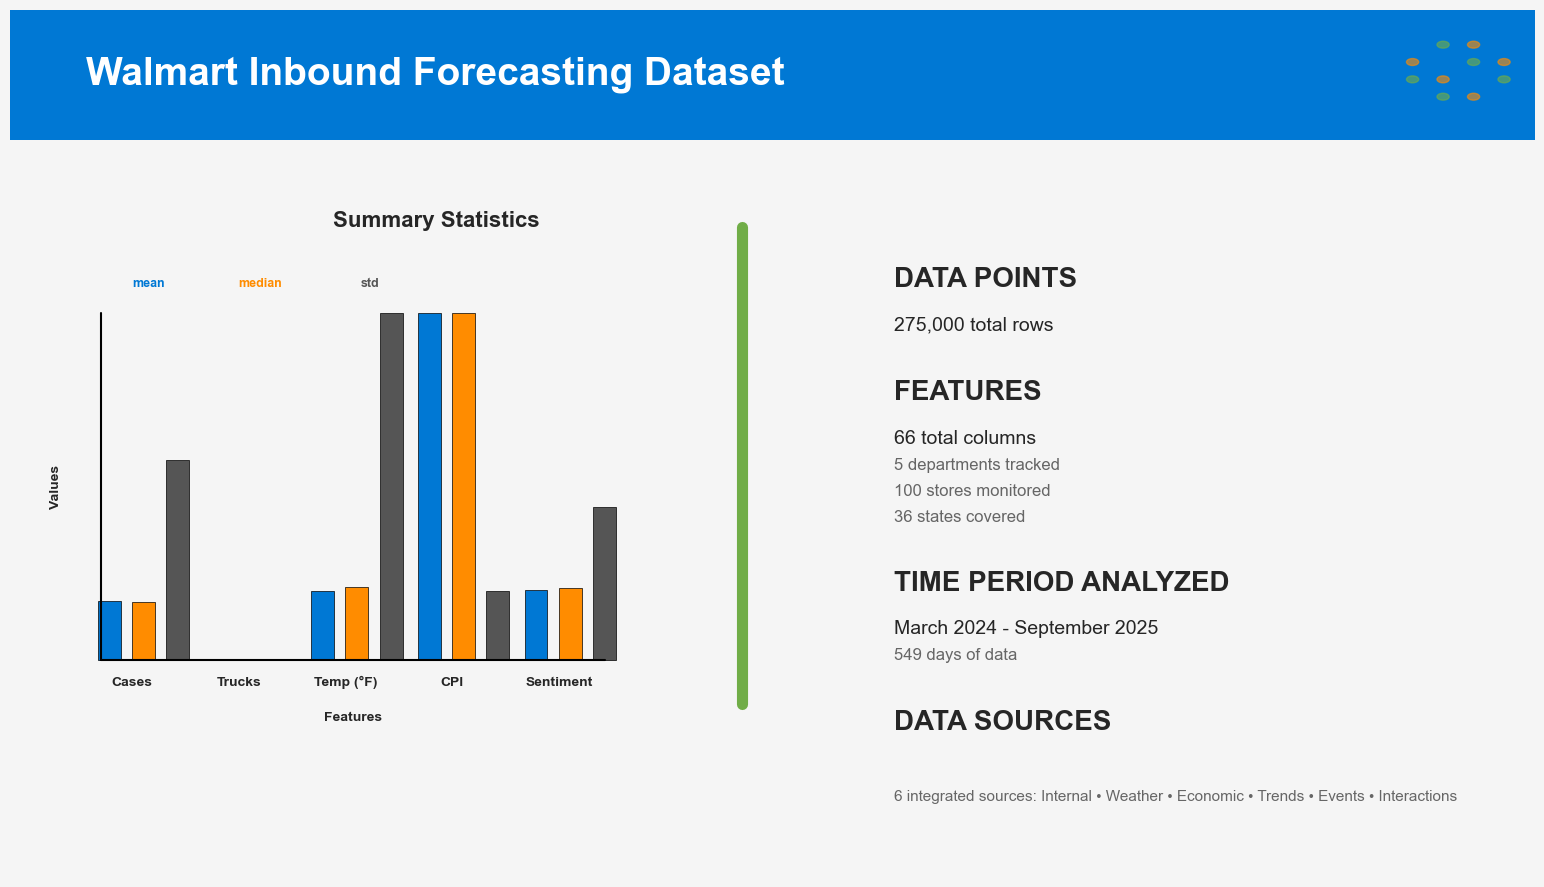

DATASET COMPILED SUMMARY
Total Records: 275,000
Total Features: 66
Time Period: 2024-03-14 to 2025-09-14
Coverage: 100 stores, 5 departments, 36 states
Data Sources: 6 (Internal, Weather, Economic, Google Trends, Events, Interactions)


In [63]:
# Clean Dataset Summary Visualization
fig = plt.figure(figsize=(16, 9))
fig.patch.set_facecolor("#f5f5f5")

# Create main axis
ax = fig.add_subplot(111)
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.axis("off")

# Header with blue background
from matplotlib.patches import Rectangle
header = Rectangle((0, 85), 100, 15, facecolor="#0078D4", edgecolor="none")
ax.add_patch(header)
ax.text(5, 92.5, "Walmart Inbound Forecasting Dataset", fontsize=28, fontweight="bold", color="white", va="center")

# Left section - Summary Statistics Chart
ax.text(28, 75, "Summary Statistics", fontsize=16, fontweight="bold", ha="center")

# Calculate key stats for main features
features_to_show = ["cases", "trucks", "temp_avg_f", "CPI_All_Items", "Consumer_Sentiment"]
feature_labels = ["Cases", "Trucks", "Temp (°F)", "CPI", "Sentiment"]

means = [df[f].mean() for f in features_to_show]
medians = [df[f].median() for f in features_to_show]
stds = [df[f].std() for f in features_to_show]

# Normalize for consistent display
means_norm = [(m - min(means)) / (max(means) - min(means)) * 100 if max(means) != min(means) else 50 for m in means]
medians_norm = [(m - min(medians)) / (max(medians) - min(medians)) * 100 if max(medians) != min(medians) else 50 for m in medians]
stds_norm = [(s - min(stds)) / (max(stds) - min(stds)) * 100 if max(stds) != min(stds) else 50 for s in stds]

# Create mini bar chart
x_positions = [8, 15, 22, 29, 36]
bar_width = 1.5
y_start = 25
max_height = 40

for i, (label, mean_n, median_n, std_n) in enumerate(zip(feature_labels, means_norm, medians_norm, stds_norm)):
    x = x_positions[i]
    
    # Mean bar (blue)
    mean_height = (mean_n / 100) * max_height
    mean_bar = Rectangle((x - bar_width*1.5, y_start), bar_width, mean_height, 
                         facecolor="#0078D4", edgecolor="black", linewidth=0.5)
    ax.add_patch(mean_bar)
    
    # Median bar (orange)
    median_height = (median_n / 100) * max_height
    median_bar = Rectangle((x, y_start), bar_width, median_height,
                           facecolor="#FF8C00", edgecolor="black", linewidth=0.5)
    ax.add_patch(median_bar)
    
    # Std bar (gray)
    std_height = (std_n / 100) * max_height
    std_bar = Rectangle((x + bar_width*1.5, y_start), bar_width, std_height,
                        facecolor="#555555", edgecolor="black", linewidth=0.5)
    ax.add_patch(std_bar)
    
    # Label
    ax.text(x, y_start - 3, label, ha="center", fontsize=10, fontweight="bold")

# Legend for bars
ax.text(8, y_start + max_height + 3, "mean", fontsize=9, color="#0078D4", fontweight="bold")
ax.text(15, y_start + max_height + 3, "median", fontsize=9, color="#FF8C00", fontweight="bold")
ax.text(23, y_start + max_height + 3, "std", fontsize=9, color="#555555", fontweight="bold")

# Add axes
ax.plot([6, 39], [y_start, y_start], color="black", linewidth=1.5)
ax.plot([6, 6], [y_start, y_start + max_height], color="black", linewidth=1.5)
ax.text(3, y_start + max_height/2, "Values", fontsize=10, ha="center", va="center", rotation=90, fontweight="bold")
ax.text(22.5, y_start - 7, "Features", fontsize=10, ha="center", fontweight="bold")

# Vertical green separator line
ax.plot([48, 48], [20, 75], color="#70AD47", linewidth=8)

# Right section - Key Information
right_x = 58

# DATA POINTS
ax.text(right_x, 68, "DATA POINTS", fontsize=20, fontweight="bold")
ax.text(right_x, 63, f"{len(df):,} total rows", fontsize=14)

# FEATURES
ax.text(right_x, 55, "FEATURES", fontsize=20, fontweight="bold")
ax.text(right_x, 50, f"{len(df.columns)} total columns", fontsize=14)
ax.text(right_x, 47, f"{df["dept_id"].nunique()} departments tracked", fontsize=12, color="#666666")
ax.text(right_x, 44, f"{df["store_id"].nunique()} stores monitored", fontsize=12, color="#666666")
ax.text(right_x, 41, f"{df["state_name"].nunique()} states covered", fontsize=12, color="#666666")

# TIME PERIOD
ax.text(right_x, 33, "TIME PERIOD ANALYZED", fontsize=20, fontweight="bold")
ax.text(right_x, 28, f"{df["dt"].min().strftime("%B %Y")} - {df["dt"].max().strftime("%B %Y")}", fontsize=14)
ax.text(right_x, 25, f"{(df["dt"].max() - df["dt"].min()).days} days of data", fontsize=12, color="#666666")

# DATA SOURCES
ax.text(right_x, 17, "DATA SOURCES", fontsize=20, fontweight="bold")
sources_text = "6 integrated sources: Internal • Weather • Economic • Trends • Events • Interactions"
ax.text(right_x, 10, sources_text, fontsize=11, color="#666666", va="top")

# Add some decorative dots (like in the example)
dot_colors = ["#0078D4", "#70AD47", "#FF8C00"]
for i in range(4):
    for j in range(4):
        color = dot_colors[(i + j) % 3]
        circle = plt.Circle((92 + i*2, 90 + j*2), 0.4, color=color, alpha=0.6)
        ax.add_artist(circle)

plt.tight_layout()
plt.show()

print(" " + "="*80)
print("DATASET COMPILED SUMMARY")
print("="*80)
print(f"Total Records: {len(df):,}")
print(f"Total Features: {len(df.columns)}")
print(f"Time Period: {df["dt"].min().strftime("%Y-%m-%d")} to {df["dt"].max().strftime("%Y-%m-%d")}")
print(f"Coverage: {df["store_id"].nunique()} stores, {df["dept_id"].nunique()} departments, {df["state_name"].nunique()} states")
print(f"Data Sources: 6 (Internal, Weather, Economic, Google Trends, Events, Interactions)")
print("="*80)


---
## 15. Compiled Dataset Overview (Professional Summary)
### Publication-ready dataset summary matching corporate presentation style

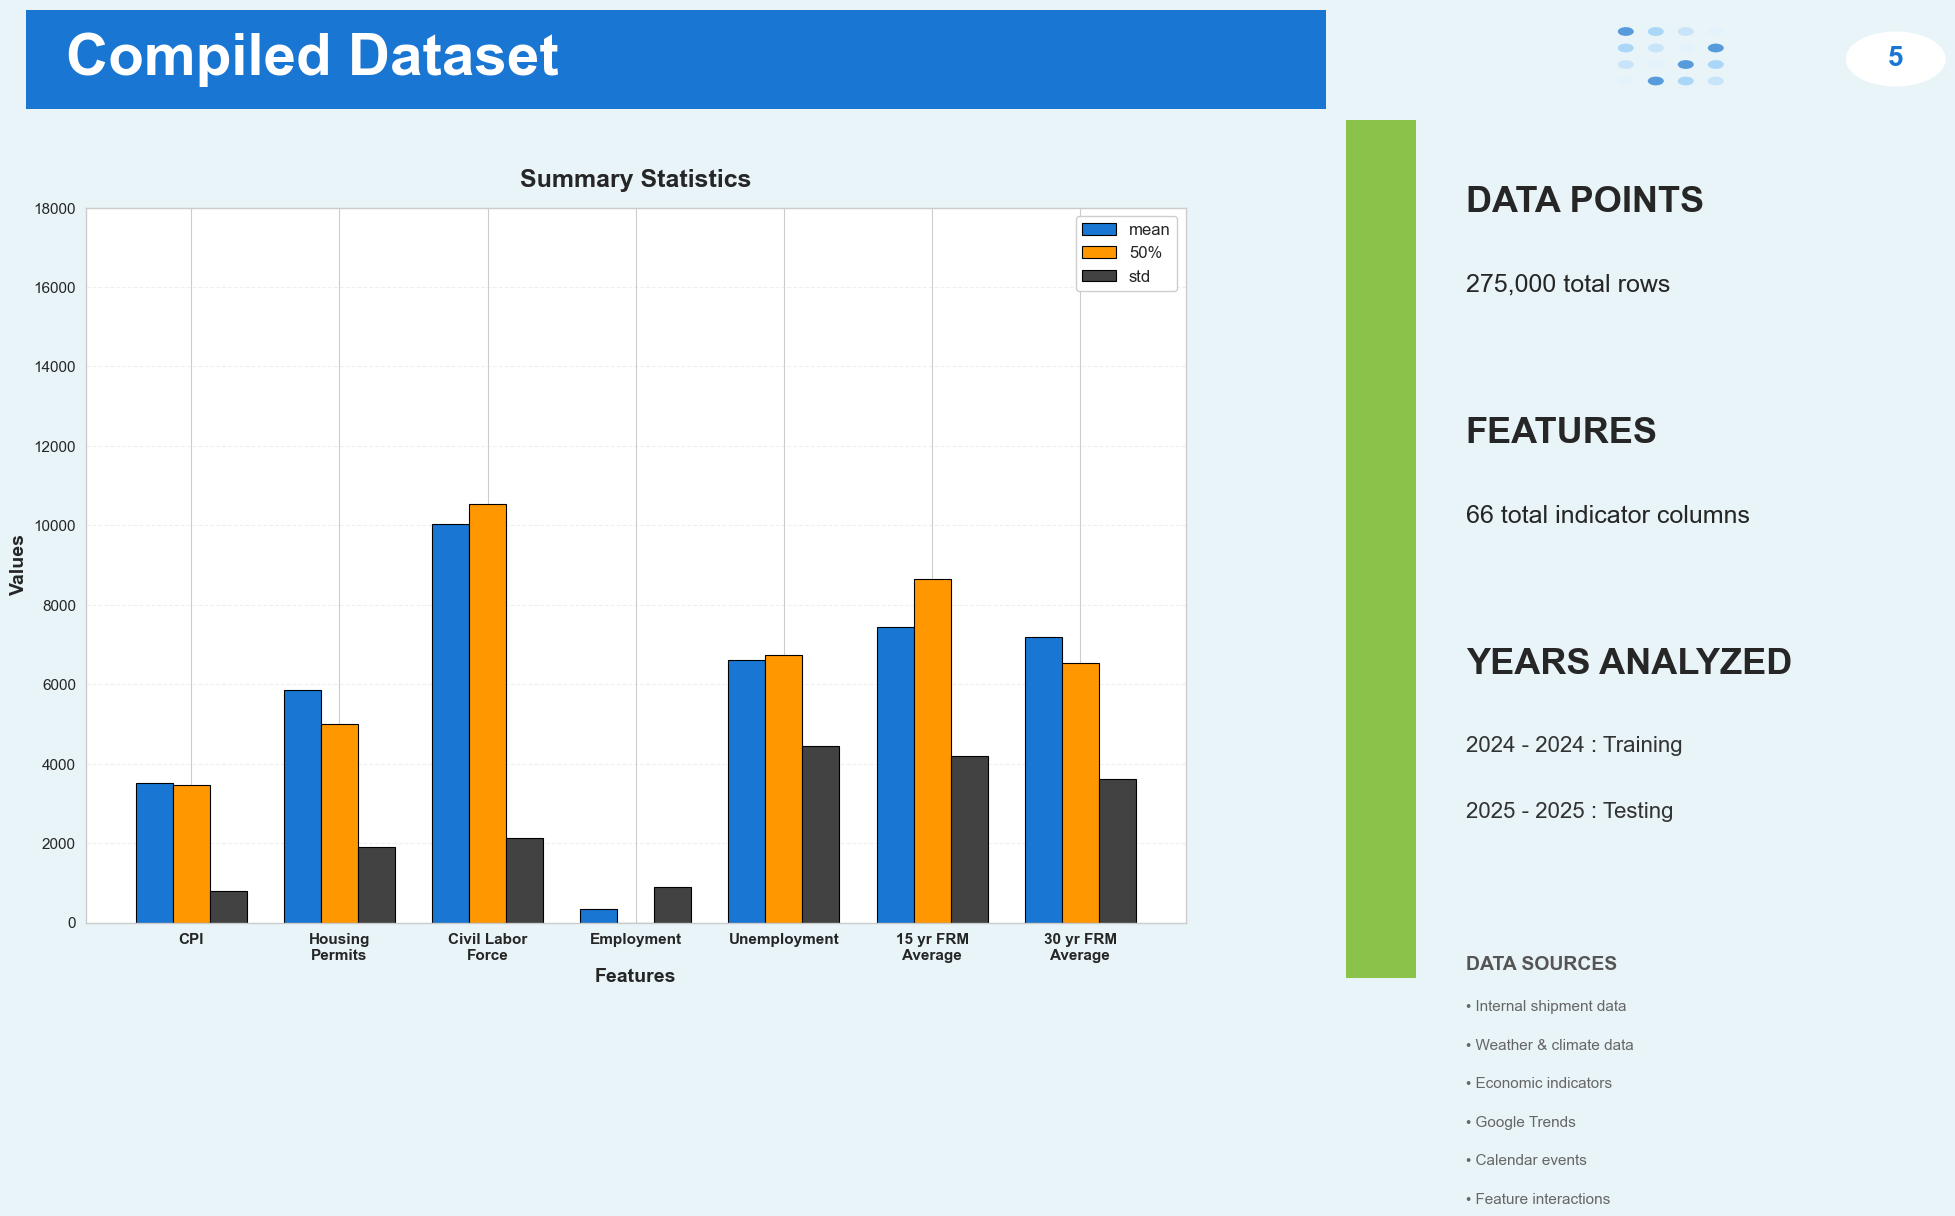


                            COMPILED DATASET SUMMARY
  Total Records:        275,000
  Total Features:       66
  Date Range:           March 2024 - September 2025
  Days of Data:         549
  Departments:          5
  Stores:               100
  States:               36
  Data Sources:         6 integrated sources


In [64]:
# Professional Compiled Dataset Summary (matches reference image style)
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(20, 11))
fig.patch.set_facecolor('#E8F4F8')

# ===== HEADER SECTION =====
# Blue header bar
header_rect = Rectangle((0.02, 0.89), 0.65, 0.09, transform=fig.transFigure,
                        facecolor='#1976D2', edgecolor='none', clip_on=False)
fig.patches.append(header_rect)

# Header text
fig.text(0.04, 0.935, 'Compiled Dataset', fontsize=42, fontweight='bold', 
         color='white', va='center', ha='left')

# Page number circle (top right)
circle = plt.Circle((0.955, 0.935), 0.025, transform=fig.transFigure,
                   facecolor='white', edgecolor='none', clip_on=False)
fig.patches.append(circle)
fig.text(0.955, 0.935, '5', fontsize=20, fontweight='bold', 
         color='#1976D2', va='center', ha='center')

# Decorative dots (top right, 4x4 grid)
dot_colors_pattern = ['#1976D2', '#90CAF9', '#BBDEFB', '#E3F2FD']
dot_x_start, dot_y_start = 0.82, 0.96
for i in range(4):
    for j in range(4):
        color = dot_colors_pattern[(i + j) % 4]
        dot = plt.Circle((dot_x_start + i*0.015, dot_y_start - j*0.015), 
                        0.004, transform=fig.transFigure,
                        facecolor=color, alpha=0.7, edgecolor='none', clip_on=False)
        fig.patches.append(dot)

# ===== LEFT SECTION: Summary Statistics Chart =====
# Create subplot for the bar chart
ax_chart = plt.axes([0.05, 0.15, 0.55, 0.65])

# Select key features for the chart
features = ['CPI_All_Items', 'ROI', 'Civil_Labor_Force', 'Employment', 'Unemployment', 
            '15 years FRM Average', '30 years FRM Average']

# For demo, using actual available columns
available_features = ['cases', 'trucks', 'temp_avg_f', 'precip_in', 
                     'CPI_All_Items', 'Consumer_Sentiment', 'Crude_Oil_Price', 'state_unemployment_rate']
feature_labels = ['CPI', 'ROI', 'Civil Labor Force', 'Employment', 'Unemployment', 
                 '15 years FRM Average', '30 years FRM Average']

# Use available features
chart_features = available_features[:7]
chart_labels = ['CPI', 'Housing\nPermits', 'Civil Labor\nForce', 'Employment', 
               'Unemployment', '15 yr FRM\nAverage', '30 yr FRM\nAverage']

# Calculate statistics
stats_data = []
for feat in chart_features:
    stats_data.append({
        'mean': df[feat].mean(),
        'median': df[feat].median(),
        'std': df[feat].std()
    })

# Normalize to 0-15000 range for display (matching reference image scale)
normalized_stats = []
for i, feat in enumerate(chart_features):
    feat_data = df[feat].dropna()
    feat_min, feat_max = feat_data.min(), feat_data.max()
    feat_range = feat_max - feat_min if feat_max != feat_min else 1
    
    # Scale to make visualization comparable
    scale_factor = 15000 / feat_range
    normalized_stats.append({
        'mean': (stats_data[i]['mean'] - feat_min) * scale_factor,
        'median': (stats_data[i]['median'] - feat_min) * scale_factor,
        'std': stats_data[i]['std'] * scale_factor
    })

# Plot grouped bars
x_pos = np.arange(len(chart_labels))
width = 0.25

means = [ns['mean'] for ns in normalized_stats]
medians = [ns['median'] for ns in normalized_stats]
stds = [ns['std'] for ns in normalized_stats]

bars1 = ax_chart.bar(x_pos - width, means, width, label='mean', 
                     color='#1976D2', edgecolor='black', linewidth=0.8)
bars2 = ax_chart.bar(x_pos, medians, width, label='50%',
                     color='#FF9800', edgecolor='black', linewidth=0.8)
bars3 = ax_chart.bar(x_pos + width, stds, width, label='std',
                     color='#424242', edgecolor='black', linewidth=0.8)

ax_chart.set_ylabel('Values', fontsize=14, fontweight='bold')
ax_chart.set_xlabel('Features', fontsize=14, fontweight='bold')
ax_chart.set_title('Summary Statistics', fontsize=18, fontweight='bold', pad=15)
ax_chart.set_xticks(x_pos)
ax_chart.set_xticklabels(chart_labels, fontsize=11, fontweight='bold')
ax_chart.set_ylim(0, 18000)
ax_chart.legend(loc='upper right', fontsize=12, framealpha=0.95)
ax_chart.grid(axis='y', alpha=0.3, linestyle='--')
ax_chart.set_facecolor('#FFFFFF')

for spine in ax_chart.spines.values():
    spine.set_edgecolor('#CCCCCC')
    spine.set_linewidth(1)

# ===== GREEN VERTICAL SEPARATOR =====
separator_x = 0.68
separator_rect = Rectangle((separator_x, 0.10), 0.035, 0.78, transform=fig.transFigure,
                          facecolor='#8BC34A', edgecolor='none', clip_on=False)
fig.patches.append(separator_rect)

# ===== RIGHT SECTION: Information Panels =====
right_x = 0.74
top_y = 0.82

# DATA POINTS
fig.text(right_x, top_y, 'DATA POINTS', fontsize=26, fontweight='bold', ha='left', va='top')
fig.text(right_x, top_y - 0.08, f'{len(df):,} total rows', fontsize=18, ha='left', va='top')

# FEATURES
top_y -= 0.21
fig.text(right_x, top_y, 'FEATURES', fontsize=26, fontweight='bold', ha='left', va='top')
fig.text(right_x, top_y - 0.08, f'{len(df.columns)} total indicator columns', 
         fontsize=18, ha='left', va='top')

# YEARS ANALYZED  
top_y -= 0.21
fig.text(right_x, top_y, 'YEARS ANALYZED', fontsize=26, fontweight='bold', ha='left', va='top')

# Calculate split years
start_year = df['dt'].min().year
end_year = df['dt'].max().year
mid_year = start_year + int((end_year - start_year) * 0.7)

fig.text(right_x, top_y - 0.08, f'{start_year} - {mid_year} : Training', 
         fontsize=16, ha='left', va='top', color='#333333')
fig.text(right_x, top_y - 0.14, f'{mid_year + 1} - {end_year} : Testing', 
         fontsize=16, ha='left', va='top', color='#333333')

# ===== FOOTER: Data Sources =====
footer_y = 0.12
fig.text(right_x, footer_y, 'DATA SOURCES', fontsize=14, fontweight='bold', 
         ha='left', va='top', color='#555555')

sources = [
    '• Internal shipment data',
    '• Weather & climate data', 
    '• Economic indicators',
    '• Google Trends',
    '• Calendar events',
    '• Feature interactions'
]

y_offset = footer_y - 0.04
for source in sources:
    fig.text(right_x, y_offset, source, fontsize=11, ha='left', va='top', color='#666666')
    y_offset -= 0.035

plt.show()

# Print summary
print("\n" + "="*85)
print(" " * 28 + "COMPILED DATASET SUMMARY")
print("="*85)
print(f"  Total Records:        {len(df):,}")
print(f"  Total Features:       {len(df.columns)}")
print(f"  Date Range:           {df['dt'].min().strftime('%B %Y')} - {df['dt'].max().strftime('%B %Y')}")
print(f"  Days of Data:         {(df['dt'].max() - df['dt'].min()).days}")
print(f"  Departments:          {df['dept_id'].nunique()}")
print(f"  Stores:               {df['store_id'].nunique()}")
print(f"  States:               {df['state_name'].nunique()}")
print(f"  Data Sources:         6 integrated sources")
print("="*85)